## Car Price Prediction
### Problem
The given dataset has 26 columns and 206 rows that can be used to predict the value of a car. Build a model to do so.
Other goals are:
> - Which variables are significant in predicting the price of a car
> - How well those variables describe the price of a car
---
---

# 1:Importing modules
---

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 2:Reading the data with briefing
---

In [58]:
import pandas as pd
import zipfile

# Path to your ZIP file
zip_file_path = "/content/archive (1).zip"

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List the files in the ZIP archive
    file_list = zip_ref.namelist()
    print("Files in ZIP:", file_list)

    # Read the CSV file
    csv_file_name = 'CarPrice_Assignment.csv'  # Choose the specific CSV file you want to read
    with zip_ref.open(csv_file_name) as file:
        data = pd.read_csv(file)

# Display the first few rows of the CSV data
data.head(3)


Files in ZIP: ['CarPrice_Assignment.csv', 'Data Dictionary - carprices.xlsx']


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [59]:
data.tail(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [61]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Inference
Here we have described the data and taken a look at the type of features


# 3:Preprocessing data
---

In [62]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [63]:
#manipulate data with another instance
temp=data
temp.columns
temp['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [64]:
## Add car company name
company_name=temp['CarName'].apply(lambda x:x.split(' ')[0])


In [65]:
temp['Company Name'] = company_name

In [66]:
temp.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero


In [67]:
#Rearrange the colums to make company name before Car Name
cols=temp.columns.to_list()
i=[]
i.append(cols[-1])
cols = cols[:2] + i + cols[2:-1]
temp = temp[cols]

In [68]:
temp.head(4)

,car_ID,symboling,Company Name,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0


In [69]:
temp['Company Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [70]:
### Correcting the errors as some company names are spelled wrong.
temp['Company Name'].replace(to_replace="maxda",value="mazda",inplace=True)
temp['Company Name'].replace(to_replace="Nissan",value="nissan",inplace=True)
temp['Company Name'].replace(to_replace="porcshce",value="porsche",inplace=True)
temp['Company Name'].replace(to_replace="toyouta",value="toyota",inplace=True)
temp['Company Name'].replace(to_replace="vokswagen",value="volkswagen",inplace=True)
temp['Company Name'].replace(to_replace="vw",value="vokswagen",inplace=True)
temp['Company Name'].unique()

<ipython-input-70-fca784dde3fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Company Name'].replace(to_replace="maxda",value="mazda",inplace=True)
<ipython-input-70-fca784dde3fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Company Name'].replace(to_replace="Nissan",value="nissan",inplace=True)
<ipython-input-70-fca784dde3fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Company Name'].replace(to_replace="p

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vokswagen', 'volvo'],
      dtype=object)

In [71]:
temp.loc[temp.duplicated()].sum() ## Warning shown, hence checking for duplicate copies

car_ID              0.0
symboling           0.0
Company Name        0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

## 3.1:Convert string numbers into int

In [72]:
temp['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [73]:
temp['cylindernumber'].replace(to_replace="four",value=4,inplace=True)
temp['cylindernumber'].replace(to_replace="eight",value=8,inplace=True)
temp['cylindernumber'].replace(to_replace="six",value=6,inplace=True)
temp['cylindernumber'].replace(to_replace="five",value=5,inplace=True)
temp['cylindernumber'].replace(to_replace="three",value=3,inplace=True)
temp['cylindernumber'].replace(to_replace="twelve",value=12,inplace=True)
temp['cylindernumber'].replace(to_replace="two",value=2,inplace=True)
temp.astype({'cylindernumber': 'int32'}).dtypes
temp['cylindernumber'].head(3)

<ipython-input-73-6a9775602000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cylindernumber'].replace(to_replace="four",value=4,inplace=True)
<ipython-input-73-6a9775602000>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cylindernumber'].replace(to_replace="eight",value=8,inplace=True)
<ipython-input-73-6a9775602000>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['cylindernumber'].replace(to_replace="six",value

0    4
1    4
2    6
Name: cylindernumber, dtype: int64

In [74]:
temp['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [75]:
temp['doornumber'].replace(to_replace="four",value=4,inplace=True)
temp['doornumber'].replace(to_replace="two",value=2,inplace=True)
temp.astype({'doornumber': 'int32'}).dtypes

<ipython-input-75-ee06d5fc3293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['doornumber'].replace(to_replace="four",value=4,inplace=True)
<ipython-input-75-ee06d5fc3293>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['doornumber'].replace(to_replace="two",value=2,inplace=True)


car_ID                int64
symboling             int64
Company Name         object
CarName              object
fueltype             object
aspiration           object
doornumber            int32
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber        int64
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [76]:
temp.loc[temp.duplicated()].sum() ## Warning shown, hence checking for duplicate copies

car_ID              0.0
symboling           0.0
Company Name        0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [77]:
temp.head(5)

,car_ID,symboling,Company Name,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,2,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,4,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,4,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 4:Data Visualization
---

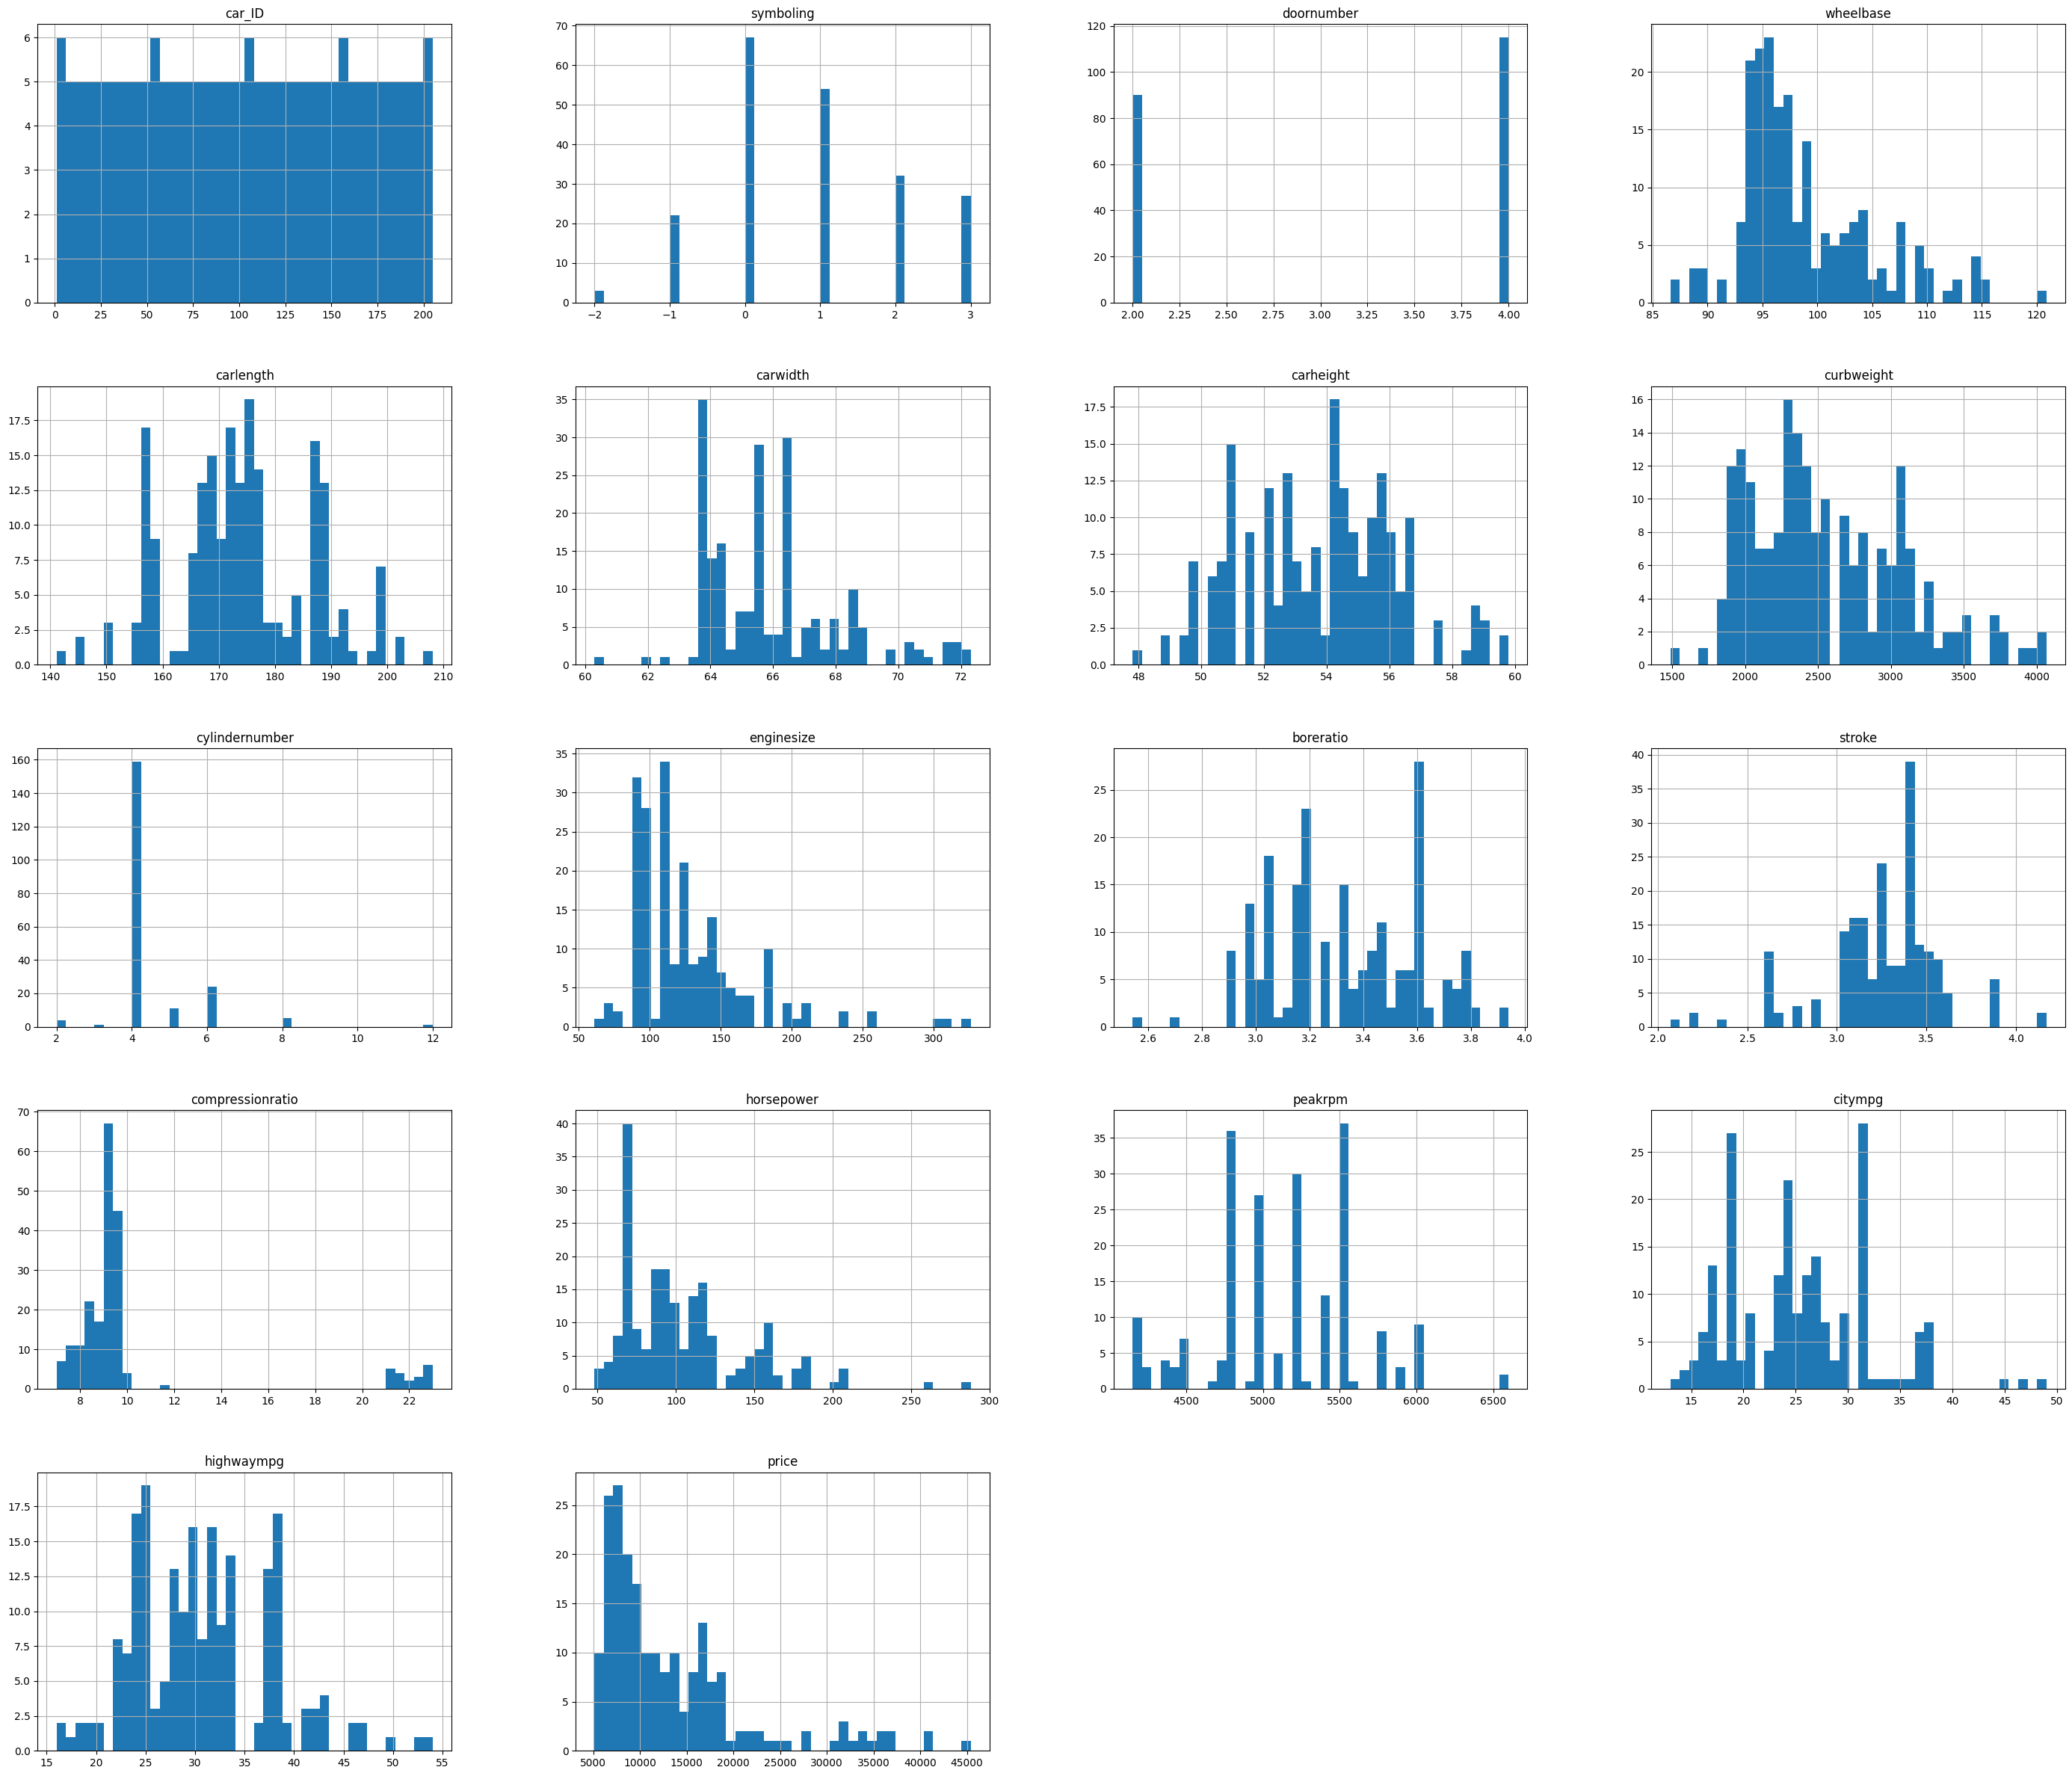

In [78]:
temp.hist(figsize = (35,30), bins = 40)
plt.show()

<ipython-input-79-c7f9a507a91f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat = temp.corr('spearman')


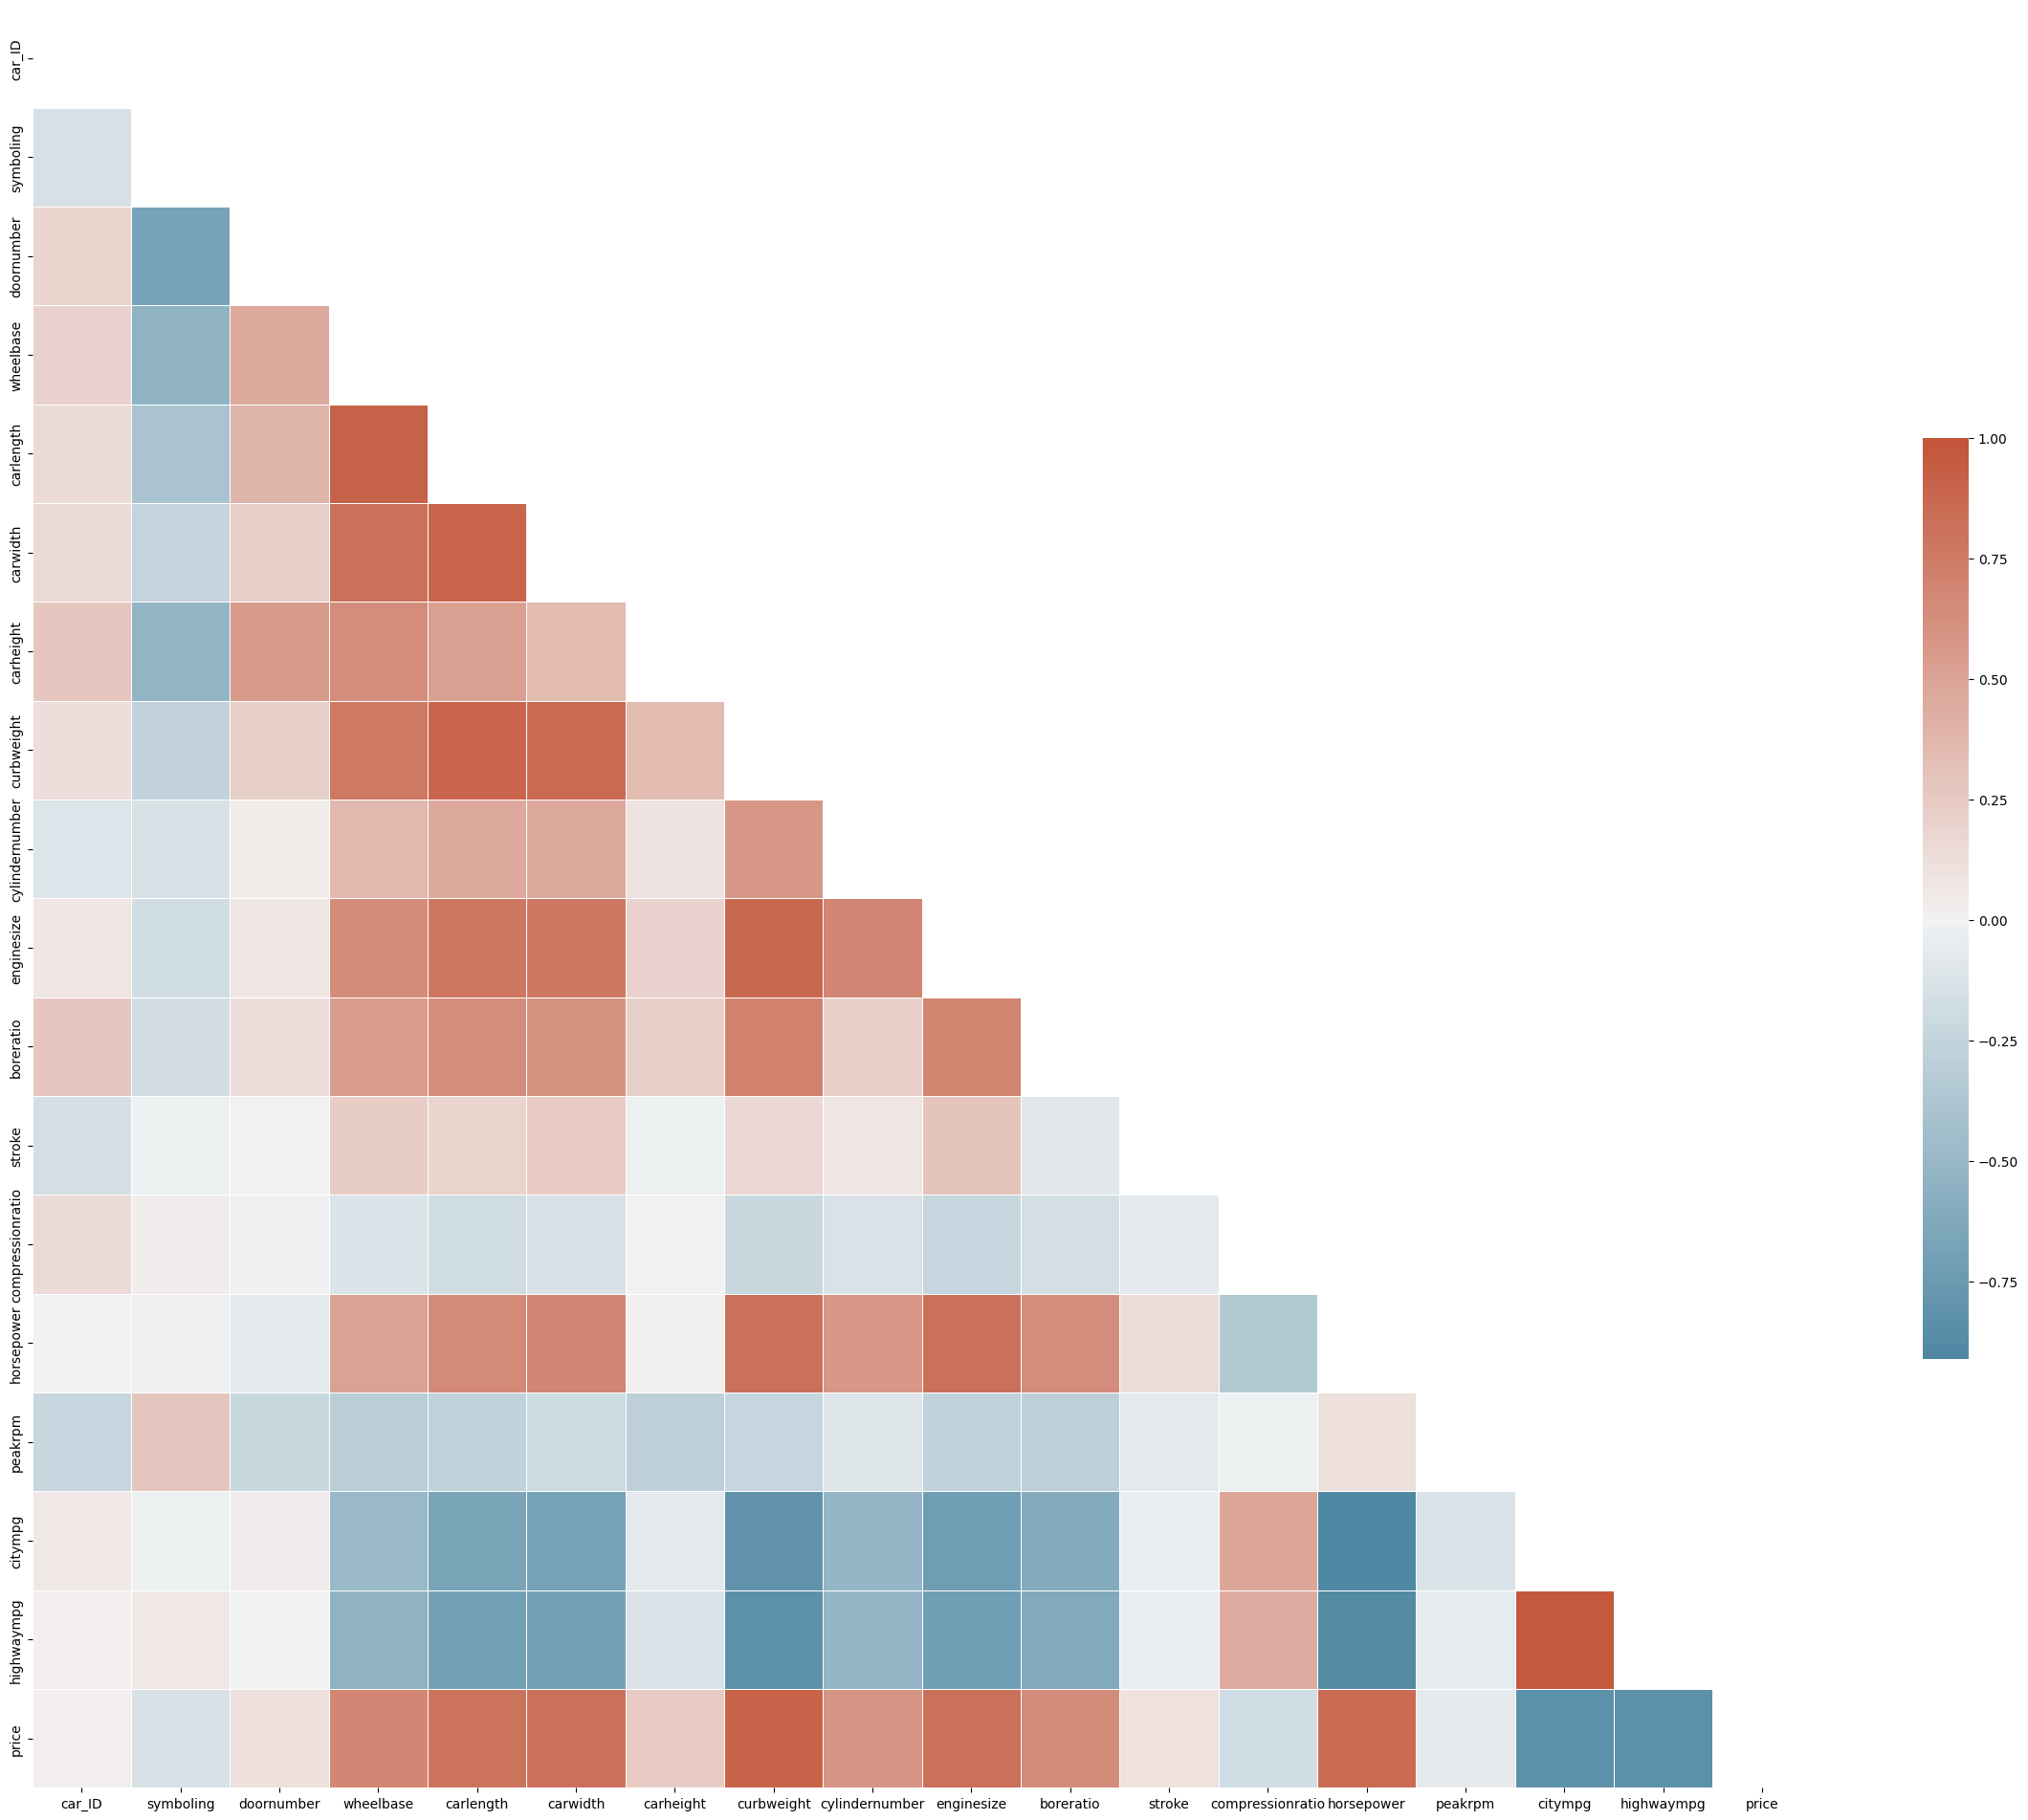

In [79]:
f, ax = plt.subplots(figsize=(30, 25))
mat = temp.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


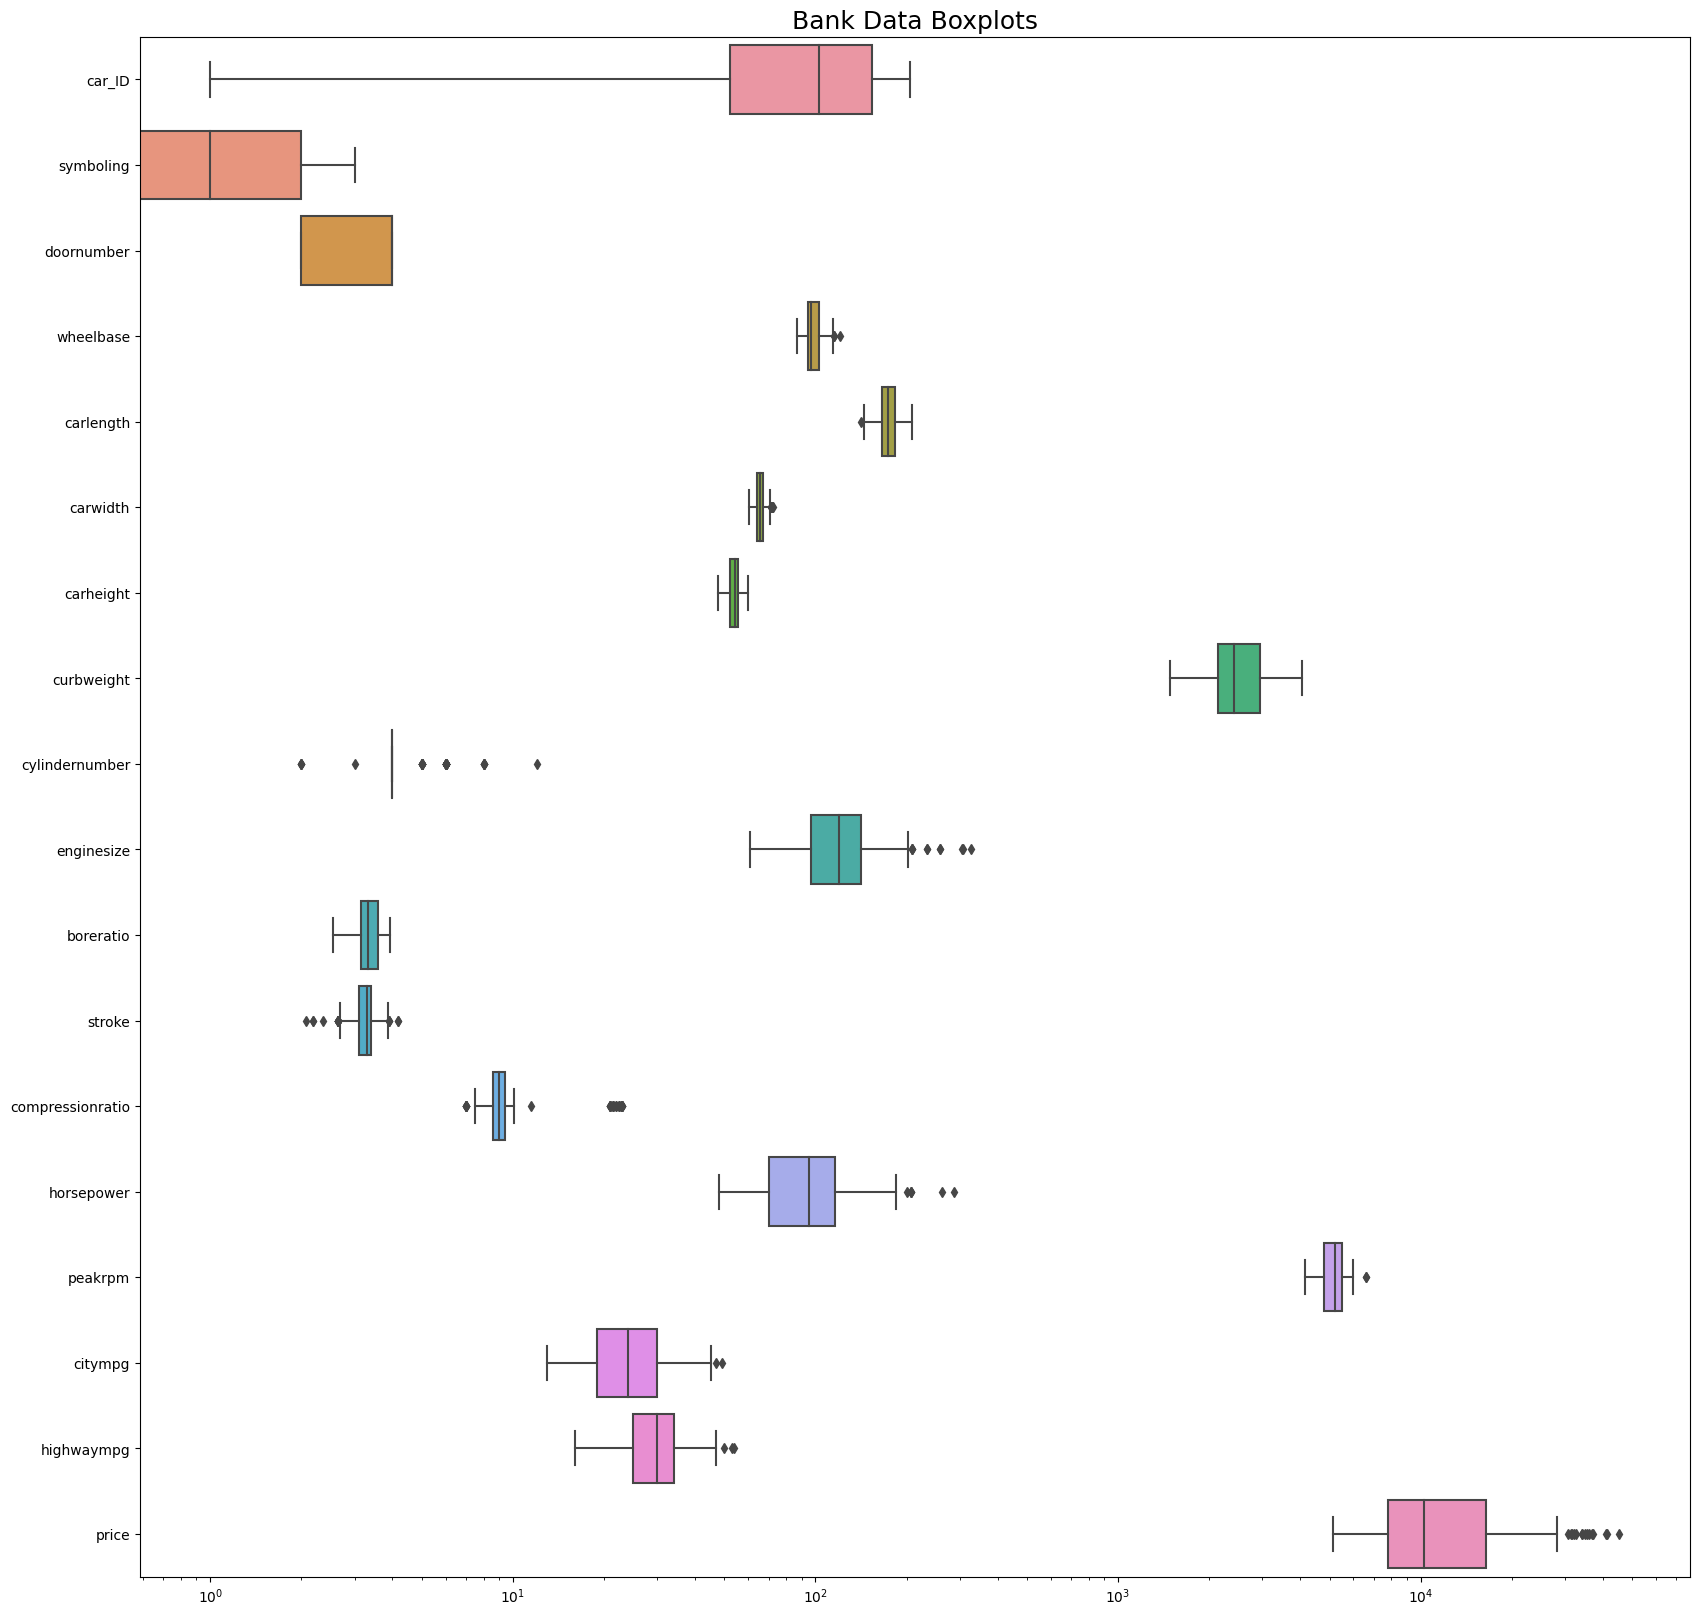

In [80]:
plt.figure(figsize = (20,20))
ax =sns.boxplot(data = temp, orient="h")
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set_xscale("log") #Using log scale as some vales are near by and not well represnted in a linear scale
plt.show()

Text(0.5, 1.0, 'Car price distplot')

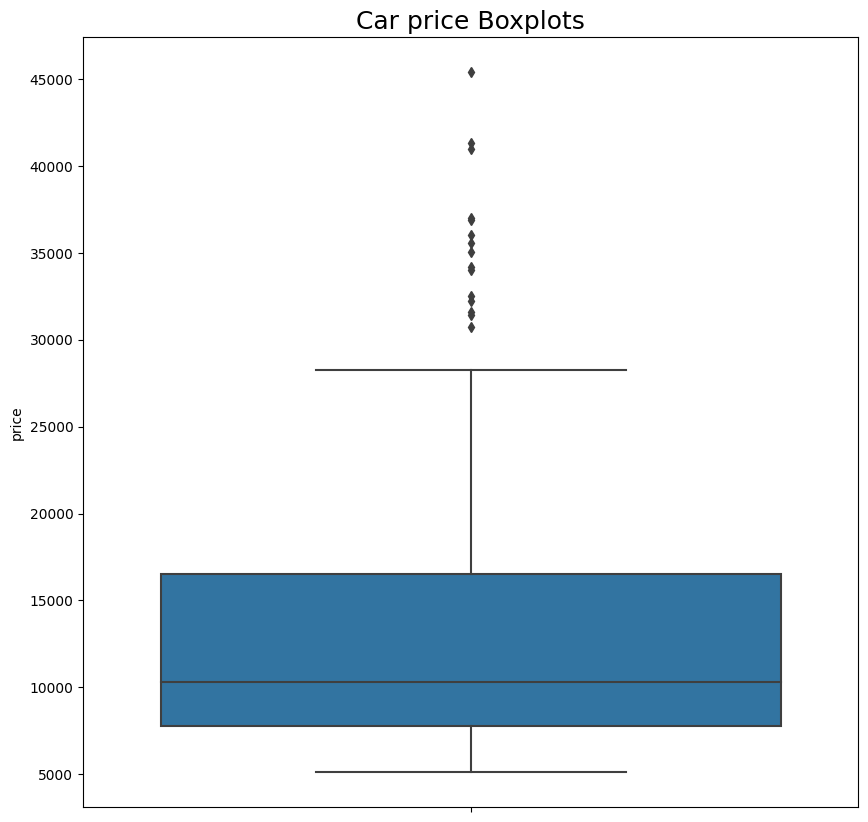

<Figure size 1000x1000 with 0 Axes>

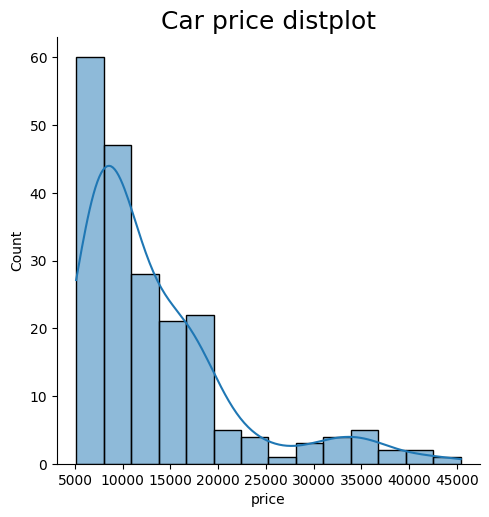

In [81]:
plt.figure(figsize = (10,10))
sns.boxplot(y="price",data = temp)
plt.title('Car price Boxplots', fontsize = 18)
plt.figure(figsize = (10,10))
sns.displot(x="price",data = temp,kde=True)
plt.title('Car price distplot', fontsize = 18)

## Inference
### Correlations

```
> Car length : Wheelbase
> Car width : Car length, Wheelbase
> Car height : Door number, Carlength, Wheelbase
> Curb weight : Car width, Car length, Wheelbase
> Engine size : Curb weight, Car width,Car length, Wheelbase
> Horsepower: Engine size, Curb weight, Car width,Car length, Wheelbase
> Price : Cylinder number, Bore ratio, Horsepower, Engine size, Curb weight, Car width,Car length, Wheelbase
> Price : It is alsio inversely related to citympg and highway mpg
```

## 4.1:Close up Visualisation of  Data
```
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheelm

```

<ipython-input-82-f179da197f32>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0,0].set_xticklabels(temp['Company Name'].unique().tolist(), rotation=90)


Text(0.5, 1.0, 'Drive wheel Histogram')

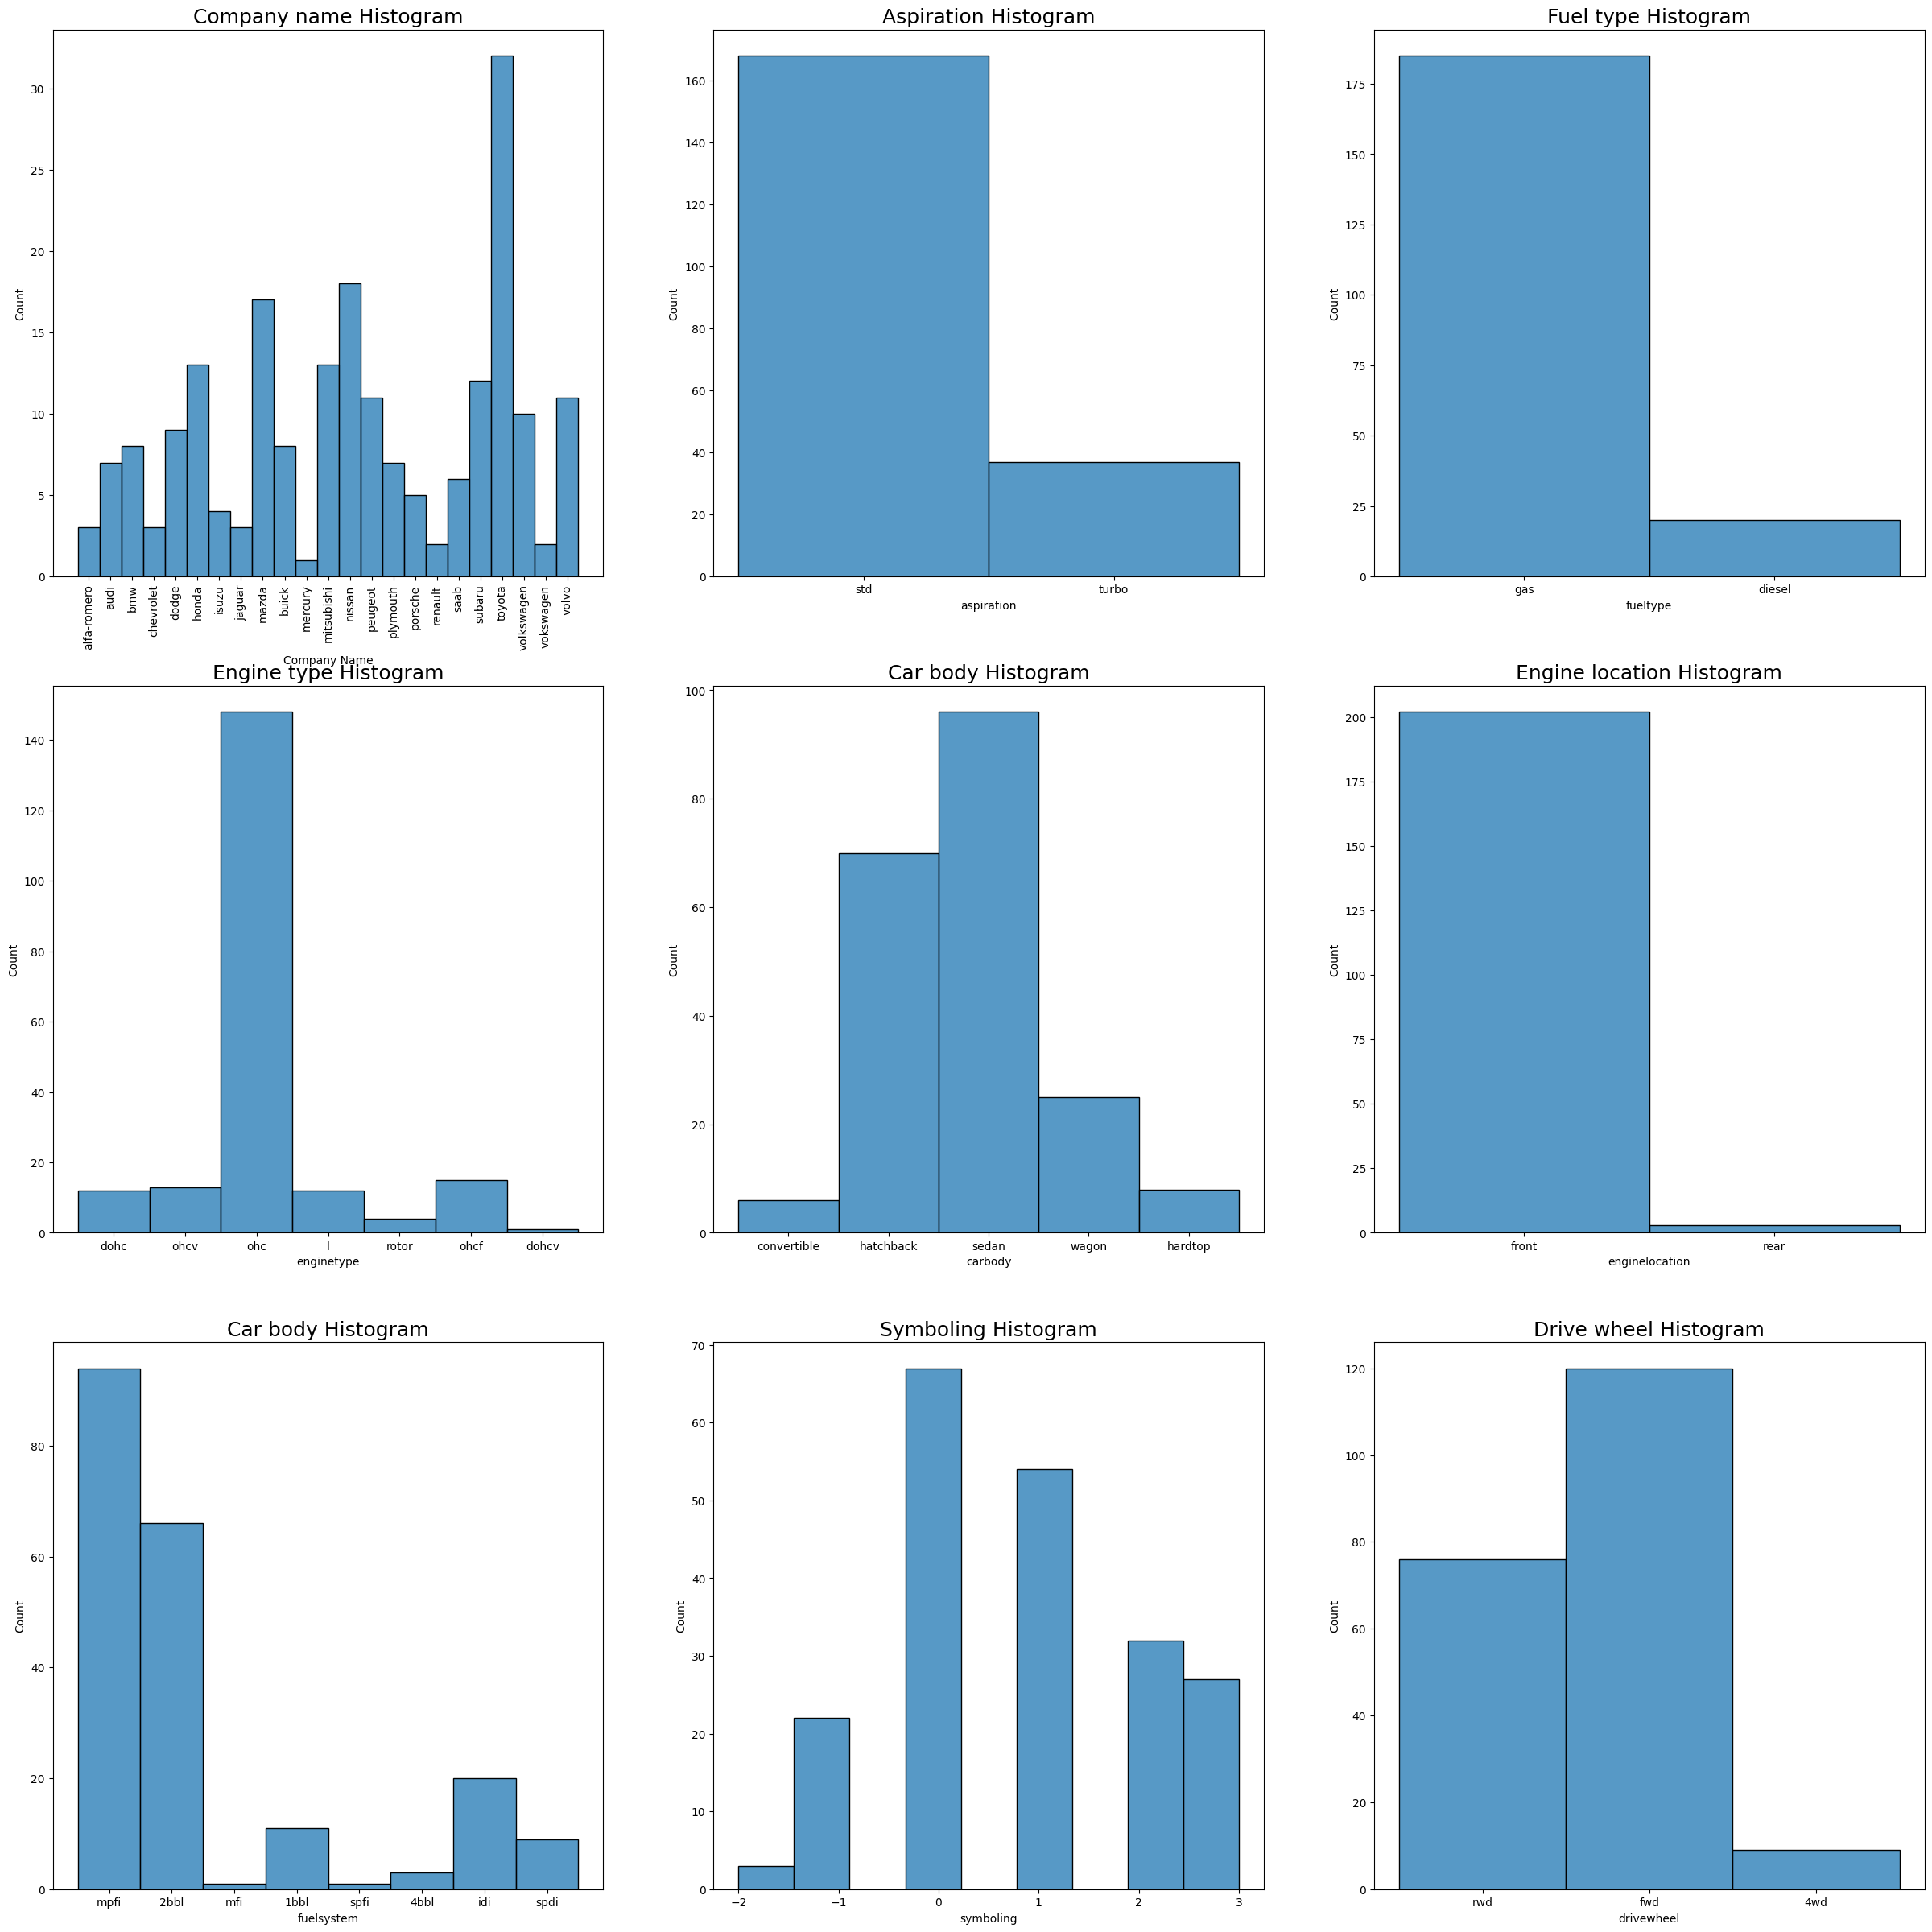

In [82]:
f, ax = plt.subplots(nrows=3,ncols=3, figsize=(30,30))

sns.histplot(x="Company Name",data = temp,ax=ax[0,0])
ax[0,0].set_title('Company name Histogram', fontsize = 18)
ax[0,0].set_xticklabels(temp['Company Name'].unique().tolist(), rotation=90)

sns.histplot(temp["aspiration"],ax=ax[0,1])
ax[0,1].set_title('Aspiration Histogram', fontsize = 18)

sns.histplot(temp["fueltype"],ax=ax[0,2])
ax[0,2].set_title('Fuel type Histogram', fontsize = 18)


sns.histplot(temp["enginetype"],ax=ax[1,0])
ax[1,0].set_title('Engine type Histogram', fontsize = 18)


sns.histplot(temp["carbody"],ax=ax[1,1])
ax[1,1].set_title('Car body Histogram', fontsize = 18)

sns.histplot(temp["enginelocation"],ax=ax[1,2])
ax[1,2].set_title('Engine location Histogram', fontsize = 18)

sns.histplot(temp["fuelsystem"],ax=ax[2,0])
ax[2,0].set_title('Car body Histogram', fontsize = 18)


sns.histplot(temp["symboling"],ax=ax[2,1])
ax[2,1].set_title('Symboling Histogram', fontsize = 18)

sns.histplot(temp["drivewheel"],ax=ax[2,2])
ax[2,2].set_title('Drive wheel Histogram', fontsize = 18)


## 4.2:Category vs price Visualization

Text(0.5, 1.0, 'Drive wheel vs Price')

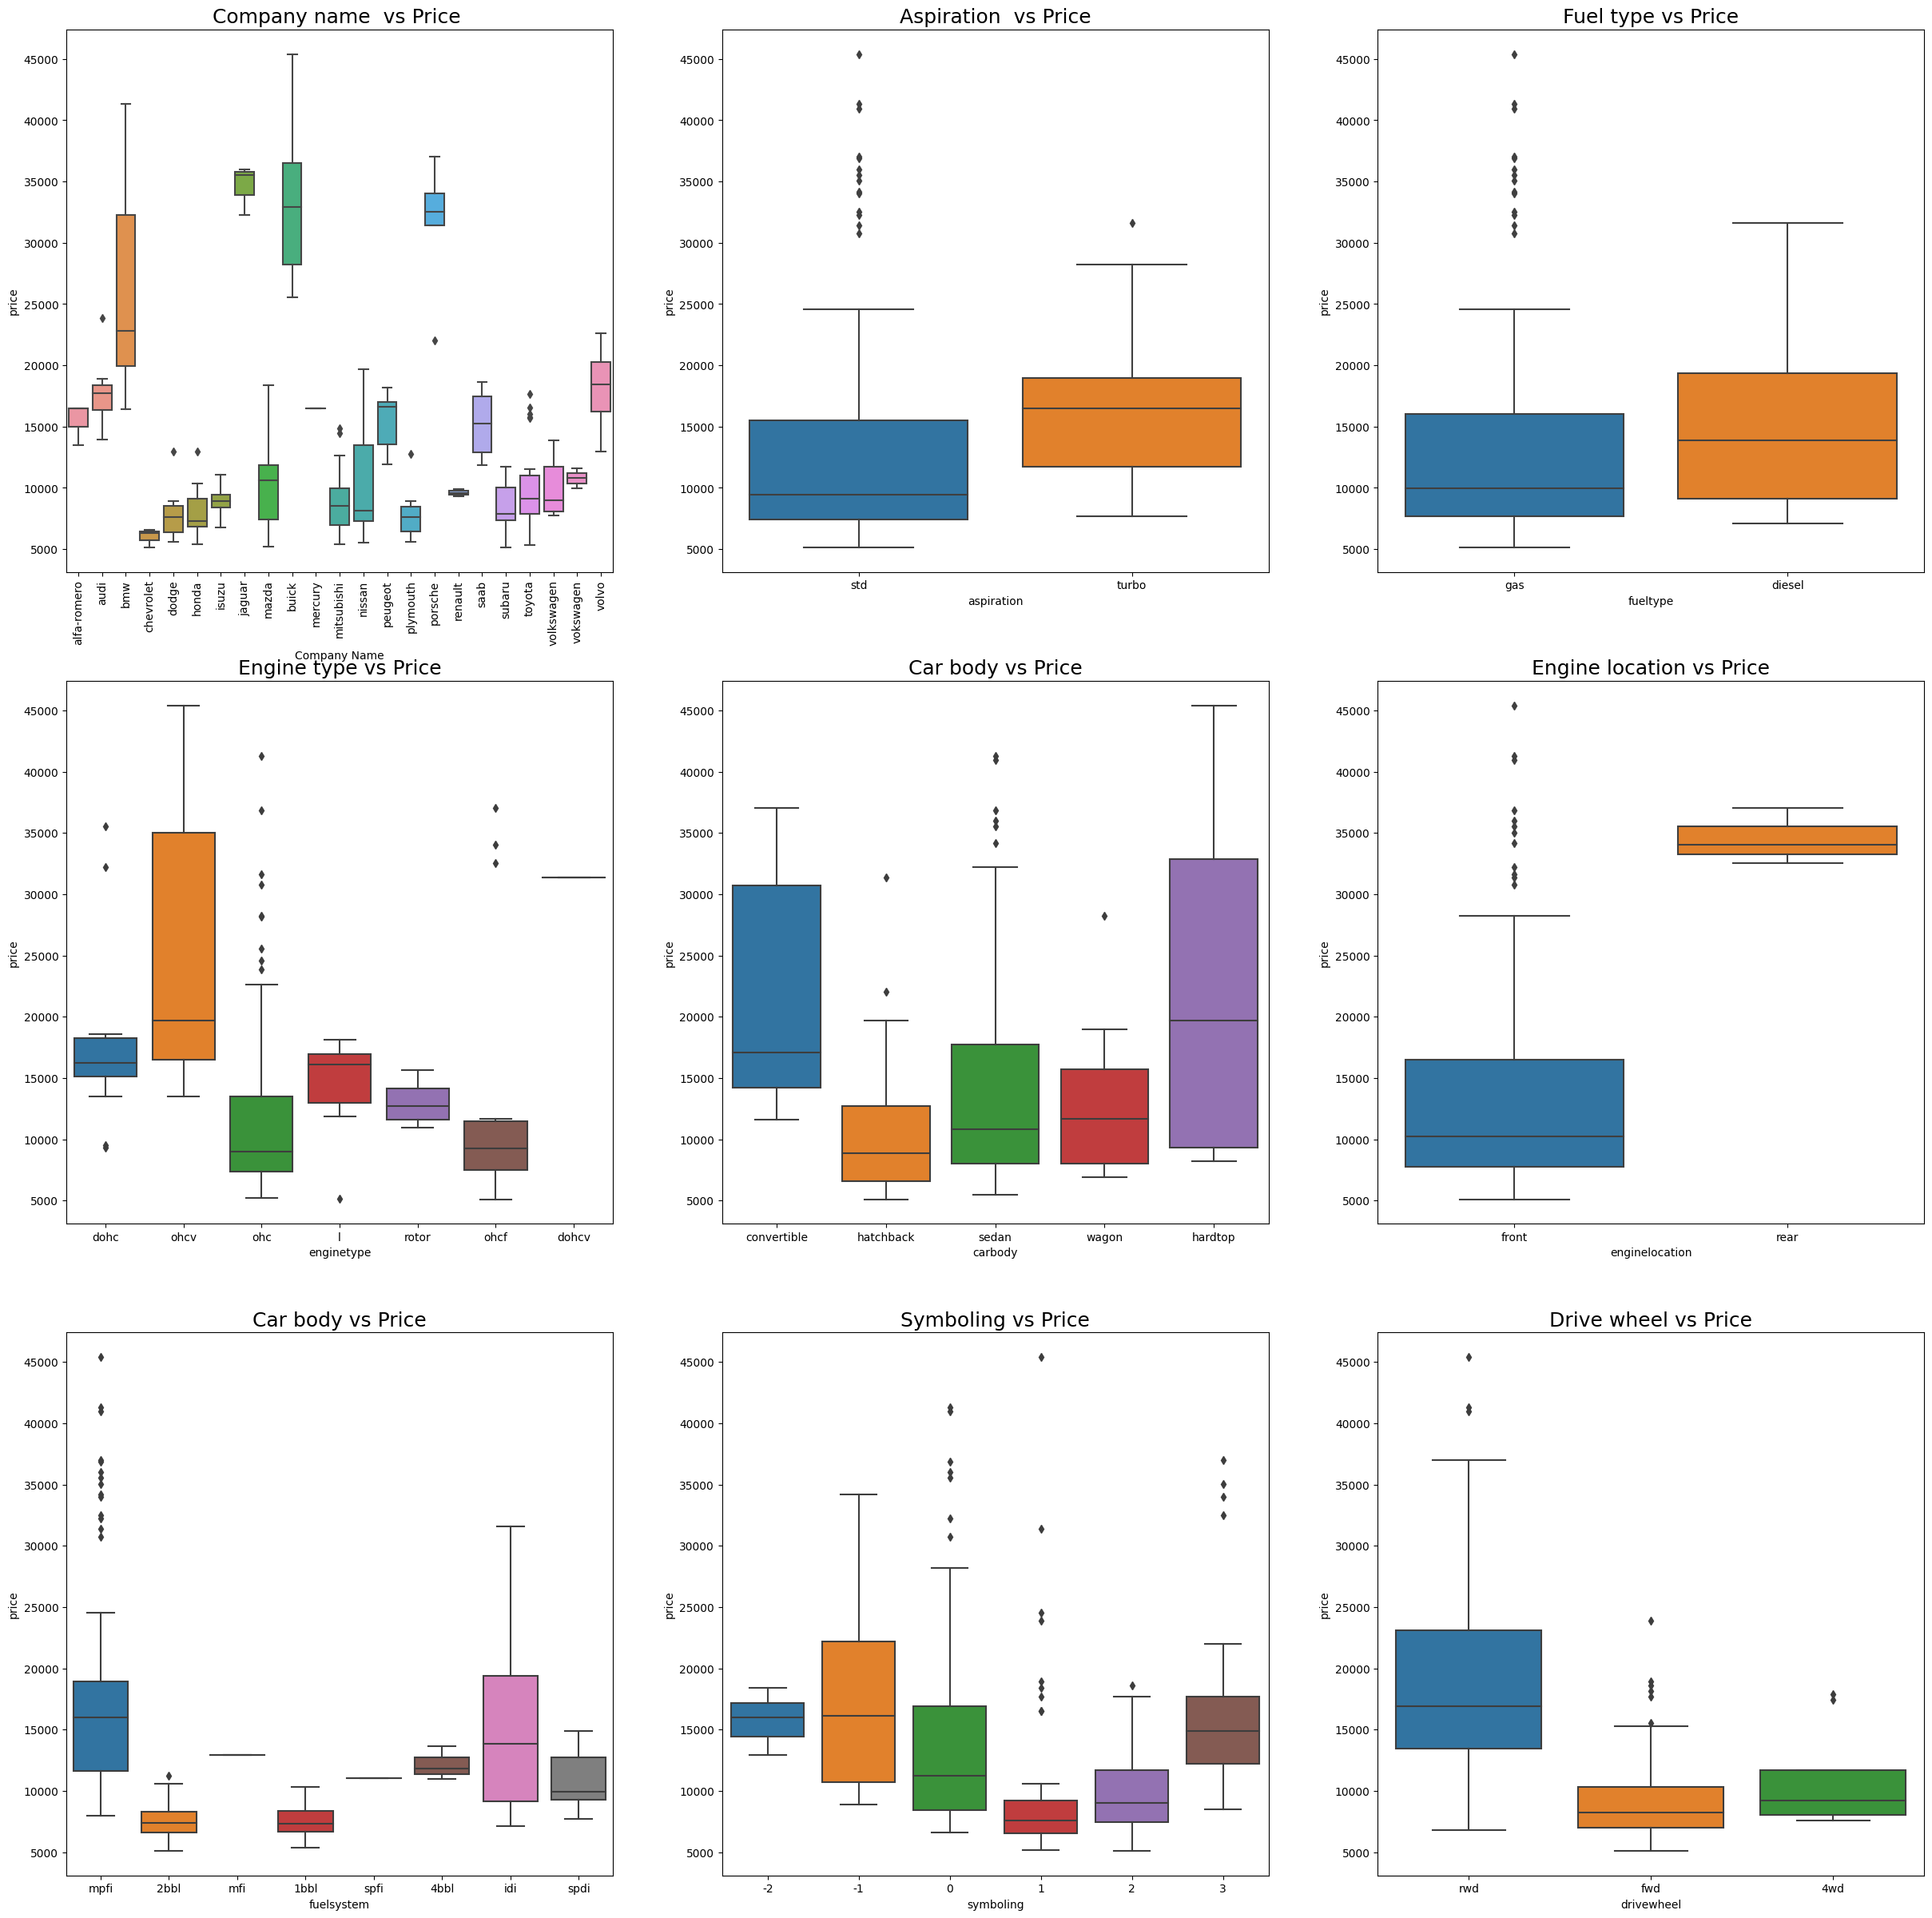

In [83]:
f, ax = plt.subplots(nrows=3,ncols=3, figsize=(30,30))

#sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))
sns.boxplot(x="Company Name",y="price",data = temp,ax=ax[0,0])
ax[0,0].set_title('Company name  vs Price ', fontsize = 18)
ax[0,0].set_xticklabels(temp['Company Name'].unique().tolist(), rotation=90)

sns.boxplot(x="aspiration",y="price",data = temp,ax=ax[0,1])
ax[0,1].set_title('Aspiration  vs Price', fontsize = 18)

sns.boxplot(x="fueltype",y="price",data = temp,ax=ax[0,2])
ax[0,2].set_title('Fuel type vs Price', fontsize = 18)


sns.boxplot(x="enginetype",y="price",data = temp,ax=ax[1,0])
ax[1,0].set_title('Engine type vs Price', fontsize = 18)


sns.boxplot(x="carbody",y="price",data = temp,ax=ax[1,1])
ax[1,1].set_title('Car body vs Price', fontsize = 18)

sns.boxplot(x="enginelocation",y="price",data = temp,ax=ax[1,2])
ax[1,2].set_title('Engine location vs Price', fontsize = 18)

sns.boxplot(x="fuelsystem",y="price",data = temp,ax=ax[2,0])
ax[2,0].set_title('Car body vs Price', fontsize = 18)


sns.boxplot(x="symboling",y="price",data = temp,ax=ax[2,1])
ax[2,1].set_title('Symboling vs Price', fontsize = 18)

sns.boxplot(x="drivewheel",y="price",data = temp,ax=ax[2,2])
ax[2,2].set_title('Drive wheel vs Price', fontsize = 18)


Text(0.5, 1.0, 'Drive wheel vs Price')

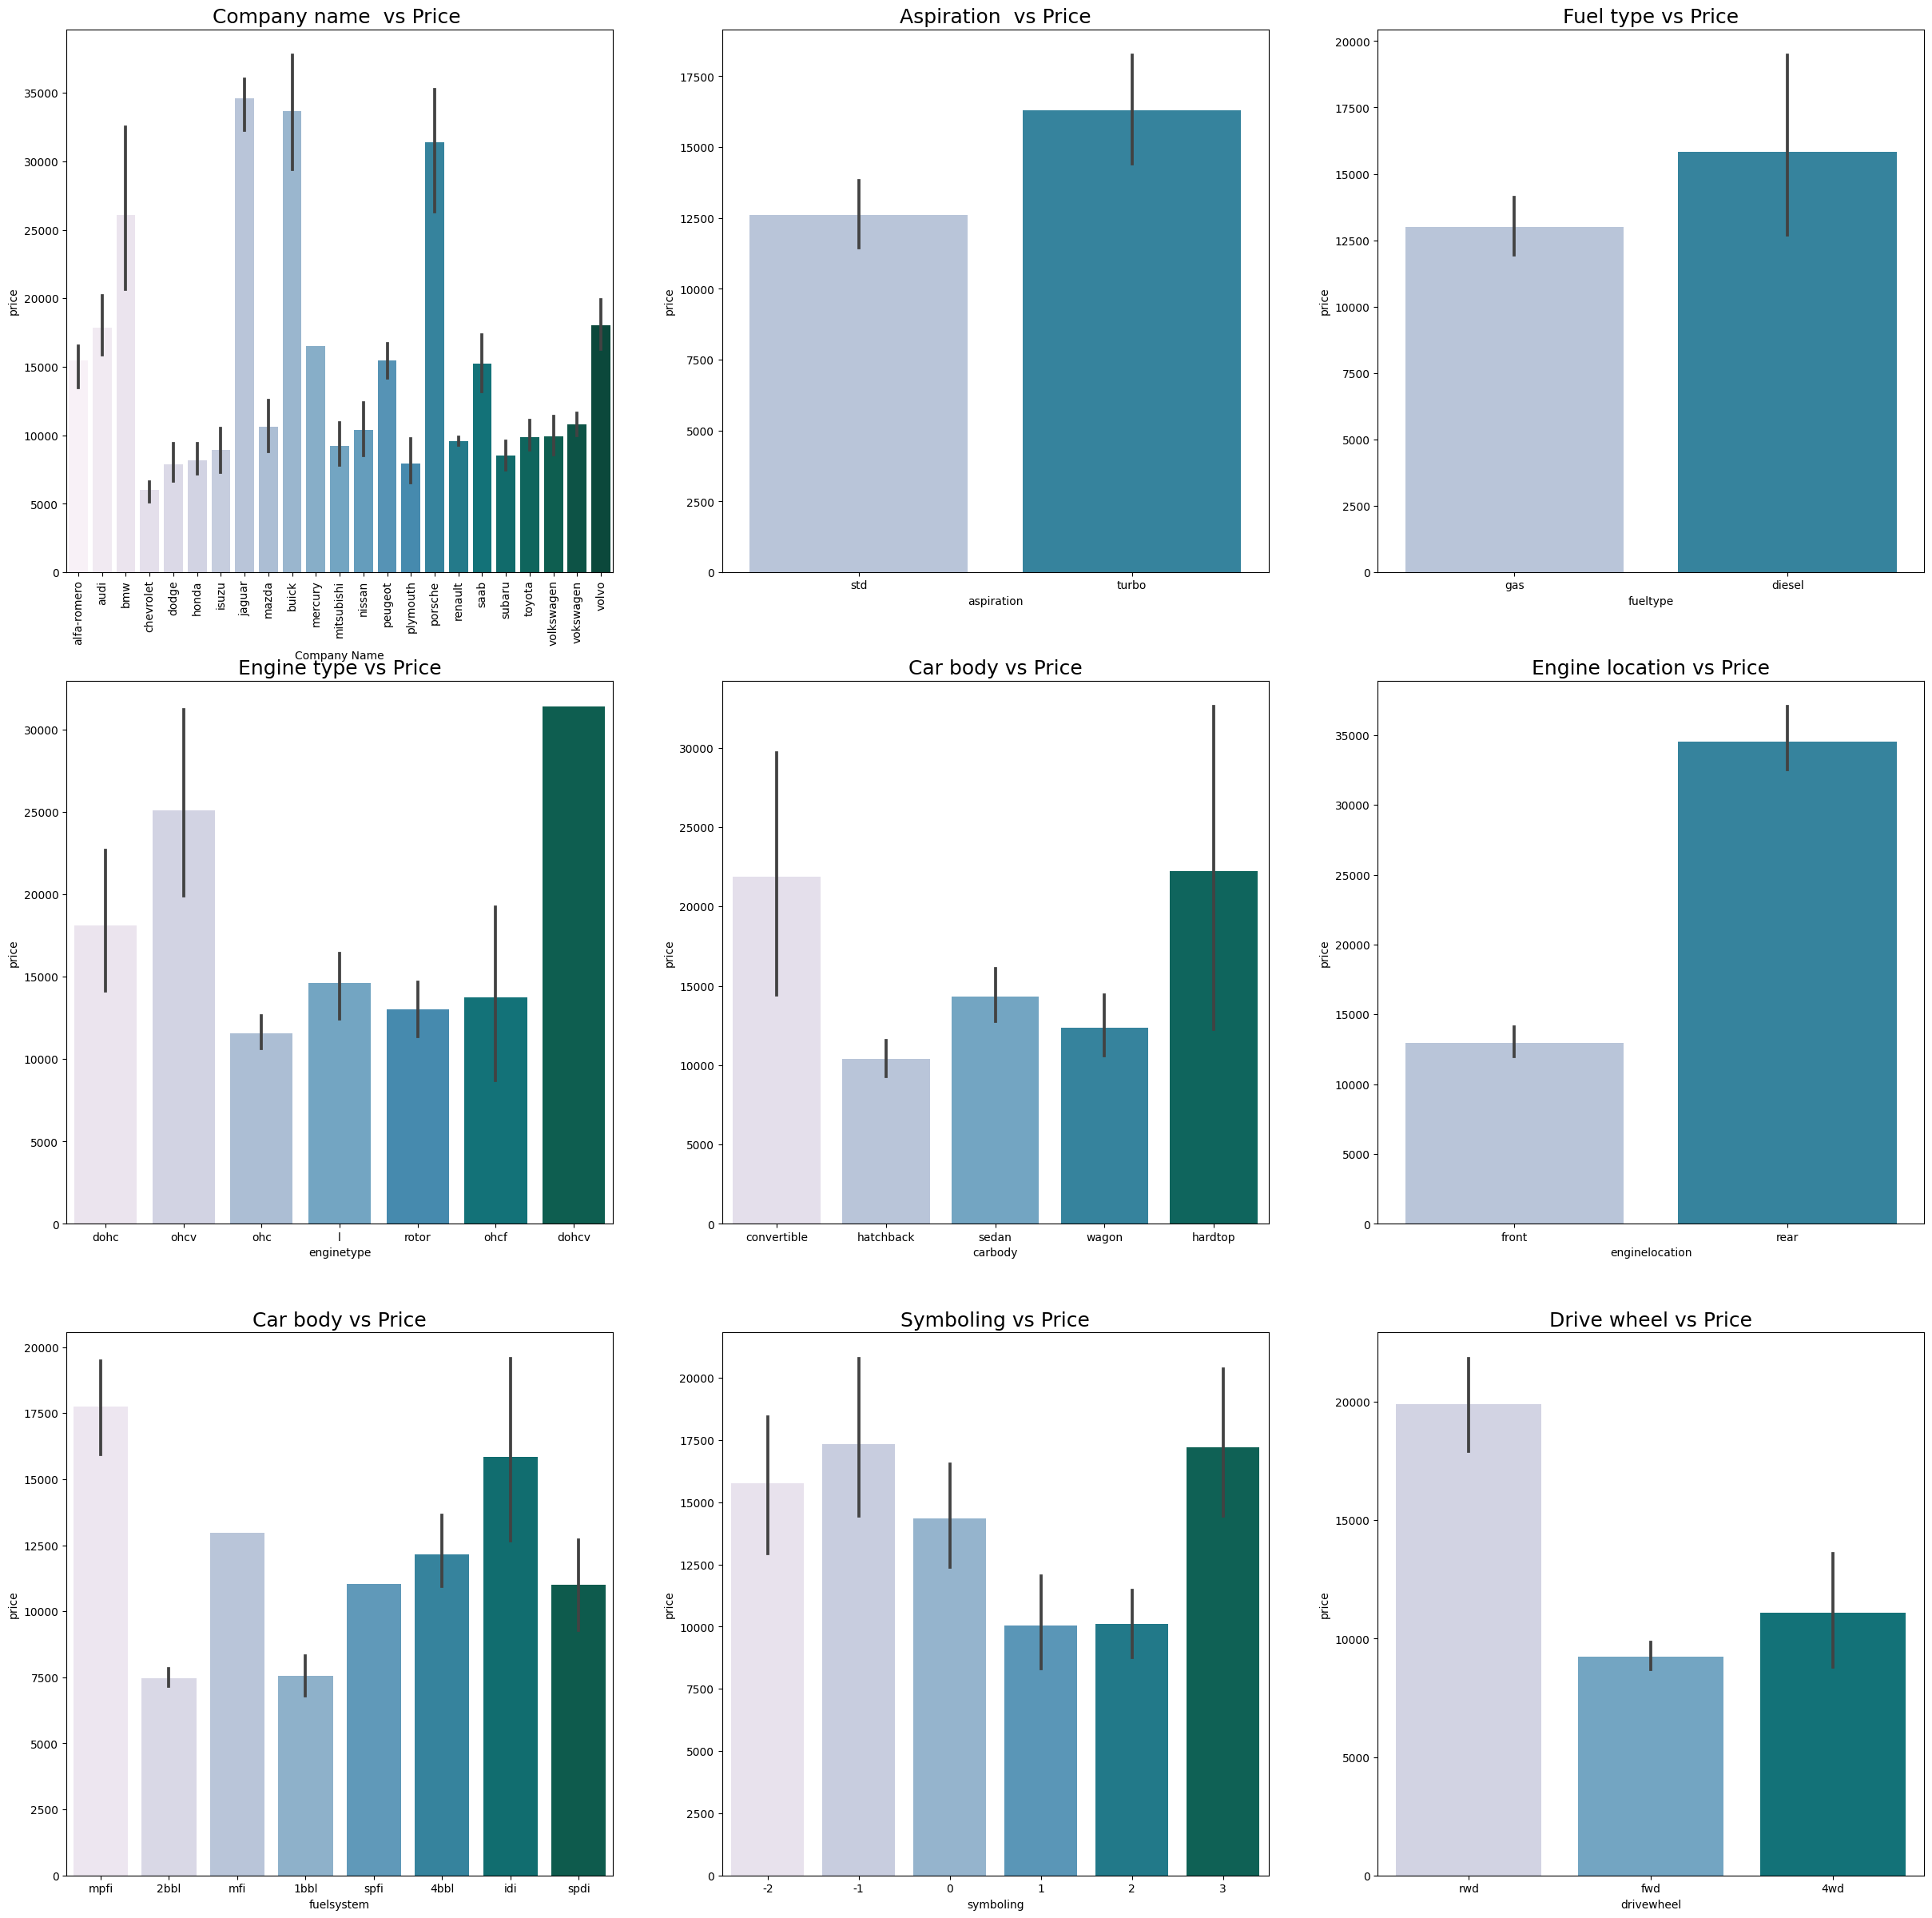

In [84]:
f, ax = plt.subplots(nrows=3,ncols=3, figsize=(30,30))

sns.barplot(x="Company Name",y="price",data = temp,ax=ax[0,0],palette=("PuBuGn"))
ax[0,0].set_title('Company name  vs Price ', fontsize = 18)
ax[0,0].set_xticklabels(temp['Company Name'].unique().tolist(), rotation=90)

sns.barplot(x="aspiration",y=temp["price"],data = temp,ax=ax[0,1],palette=("PuBuGn"))
ax[0,1].set_title('Aspiration  vs Price', fontsize = 18)

sns.barplot(x="fueltype",y="price",data = temp,ax=ax[0,2],palette=("PuBuGn"))
ax[0,2].set_title('Fuel type vs Price', fontsize = 18)


sns.barplot(x="enginetype",y="price",data = temp,ax=ax[1,0],palette=("PuBuGn"))
ax[1,0].set_title('Engine type vs Price', fontsize = 18)


sns.barplot(x="carbody",y="price",data = temp,ax=ax[1,1],palette=("PuBuGn"))
ax[1,1].set_title('Car body vs Price', fontsize = 18)

sns.barplot(x="enginelocation",y="price",data = temp,ax=ax[1,2],palette=("PuBuGn"))
ax[1,2].set_title('Engine location vs Price', fontsize = 18)

sns.barplot(x="fuelsystem",y="price",data = temp,ax=ax[2,0],palette=("PuBuGn"))
ax[2,0].set_title('Car body vs Price', fontsize = 18)

sns.barplot(x="symboling",y="price",data = temp,ax=ax[2,1],palette=("PuBuGn"))
ax[2,1].set_title('Symboling vs Price', fontsize = 18)

sns.barplot(x="drivewheel",y="price",data = temp,ax=ax[2,2],palette=("PuBuGn"))
ax[2,2].set_title('Drive wheel vs Price', fontsize = 18)


## Inference
### Based on the count
```
> Most common car : Toyota
> Most aspired : std
> Most fuel type : Gas
> Most common engine type : ohc
> Most common body type : Sedan
> Most common engine location : Front
> Most common car body type : mpfi
> Most common symboling type: 0
> Most common drive wheel type : fwd
```   

<br>

### Price vs categories

```
> Companies with most costly cars: bmw, buick, jaguar, porche
> Aspirations : turbmo most costly
> Fuel type : Gas most costly
> Engine type : dohcv most costly
> Body type : Hardtop and convertible most costly
> Engine location : rear location most costly
> Car body type : mpfi most costly
> Symboling type: -1 and 3 types most costly
> Drive wheel type : rwd most costly
```   

## 4.3:Visualising numerical data¶

Text(0.5, 1.0, 'Highwaympg vs Price')

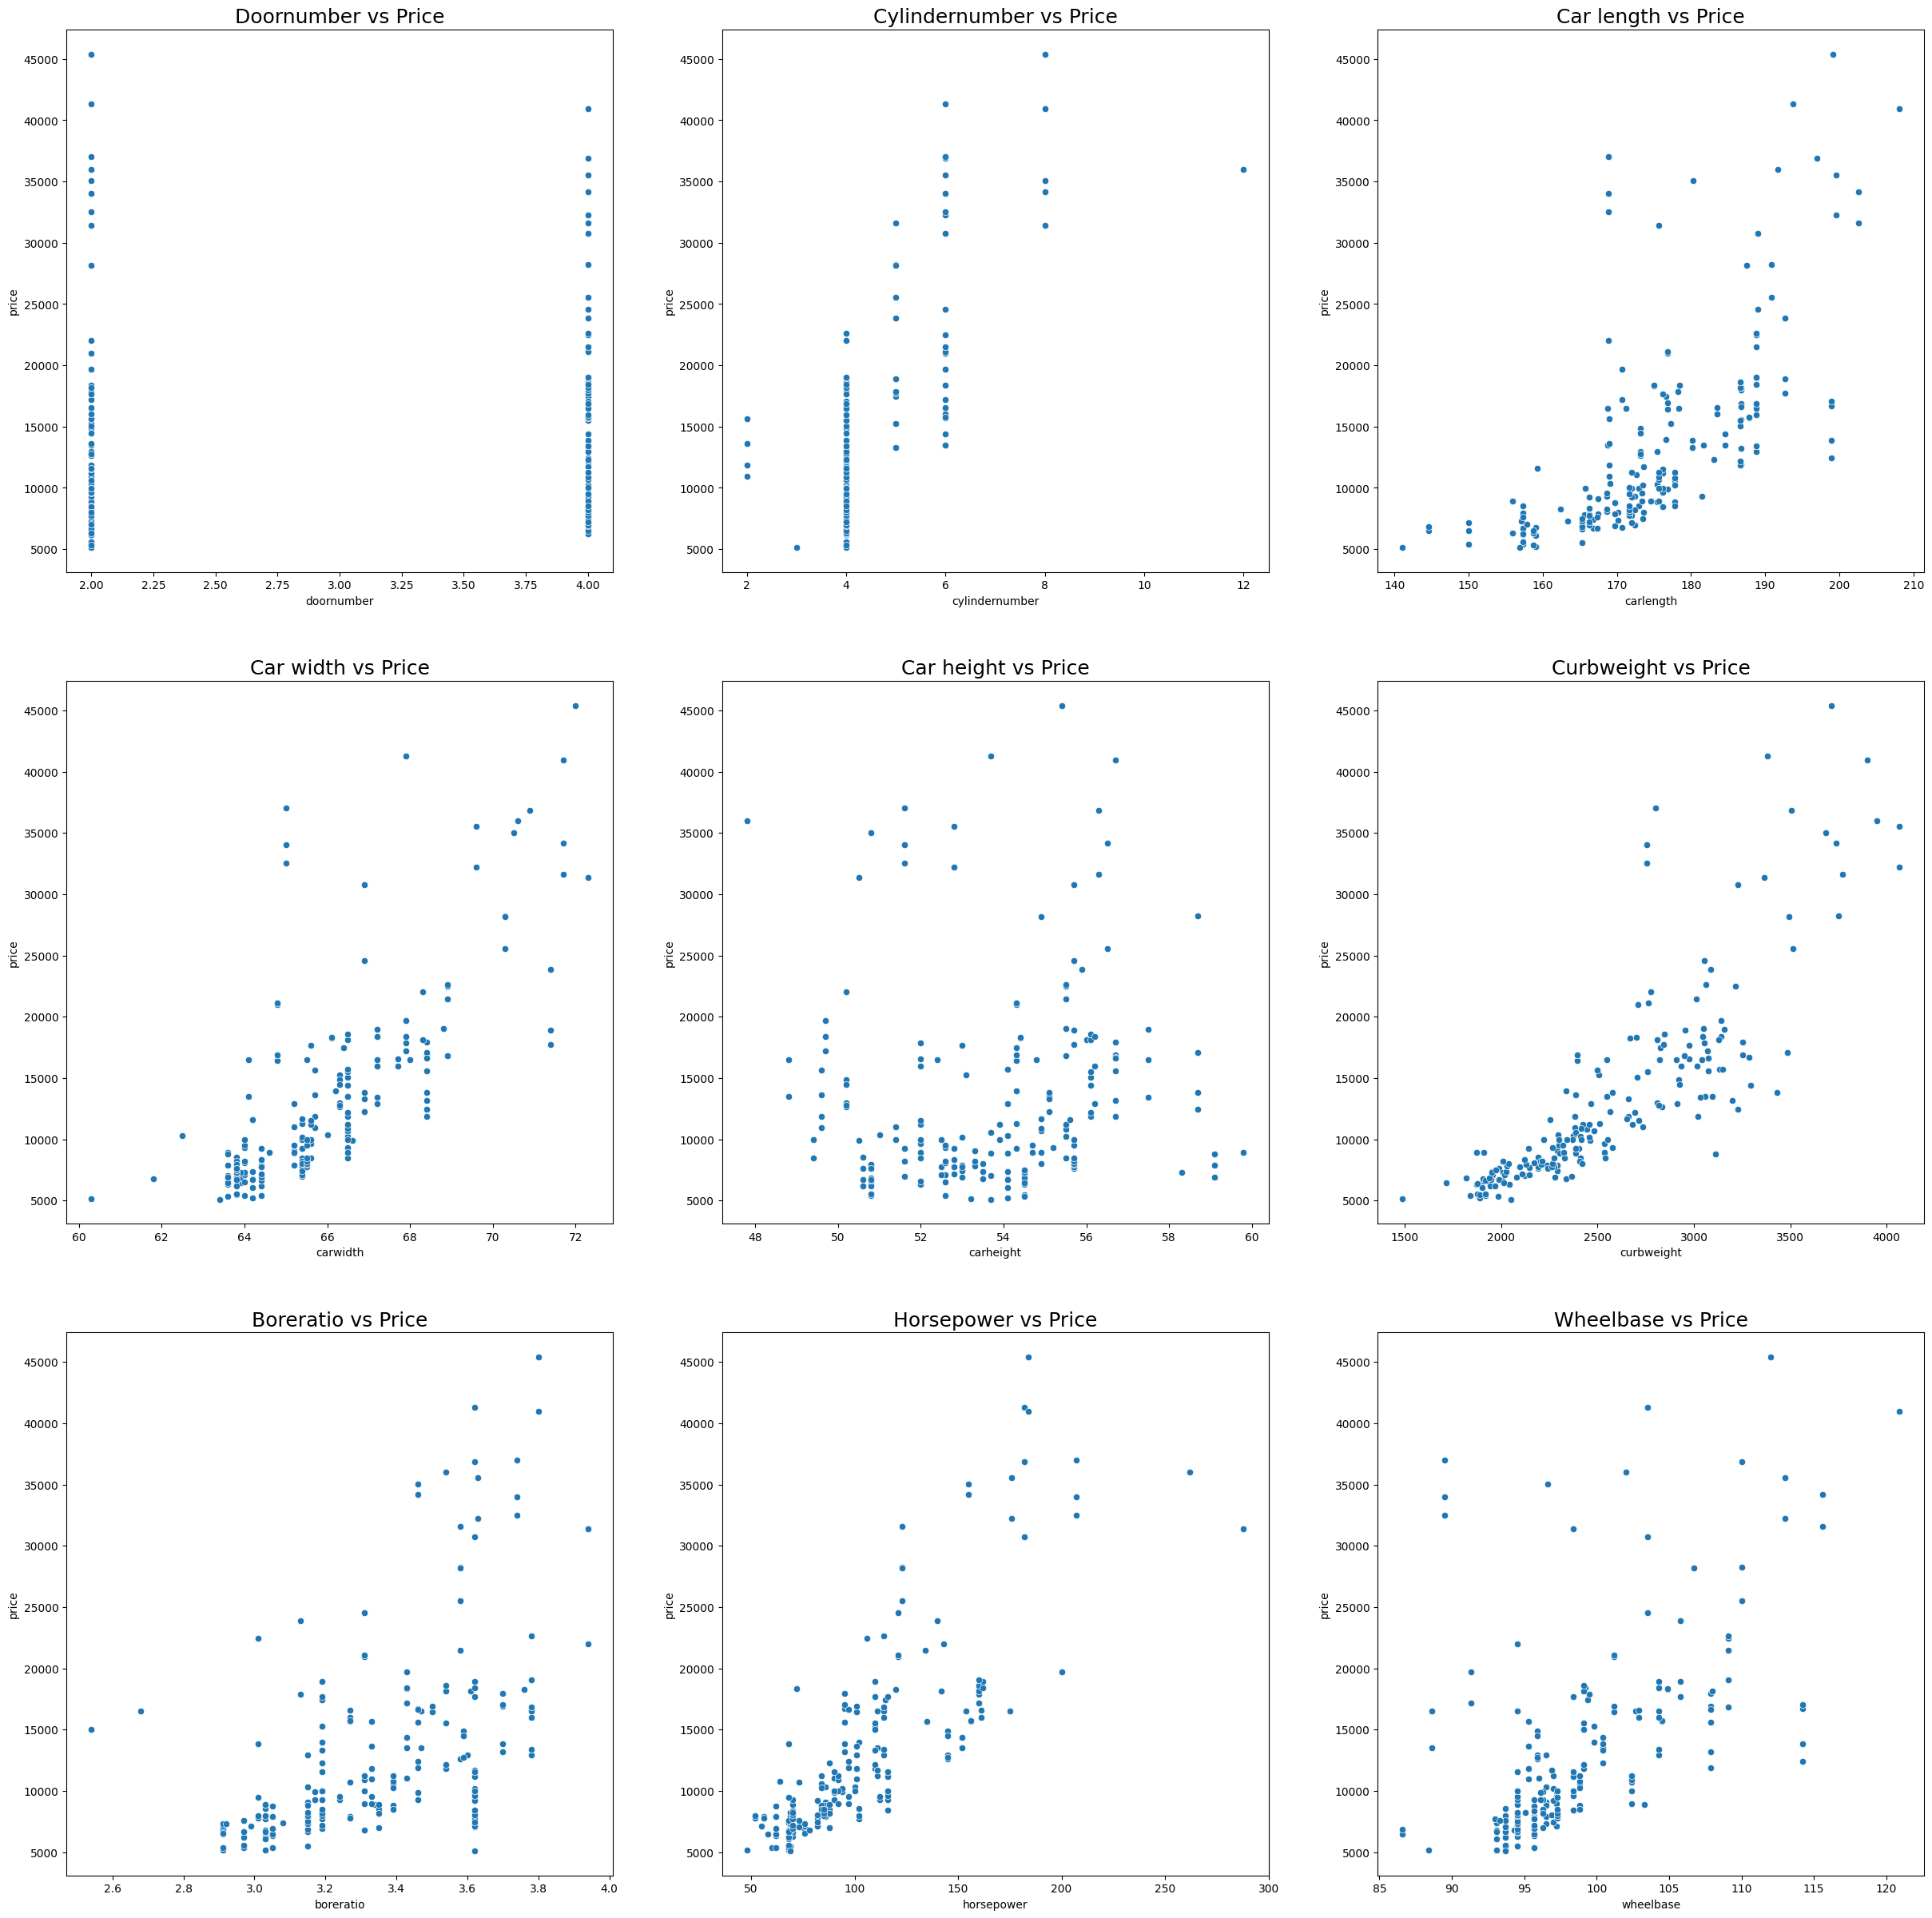

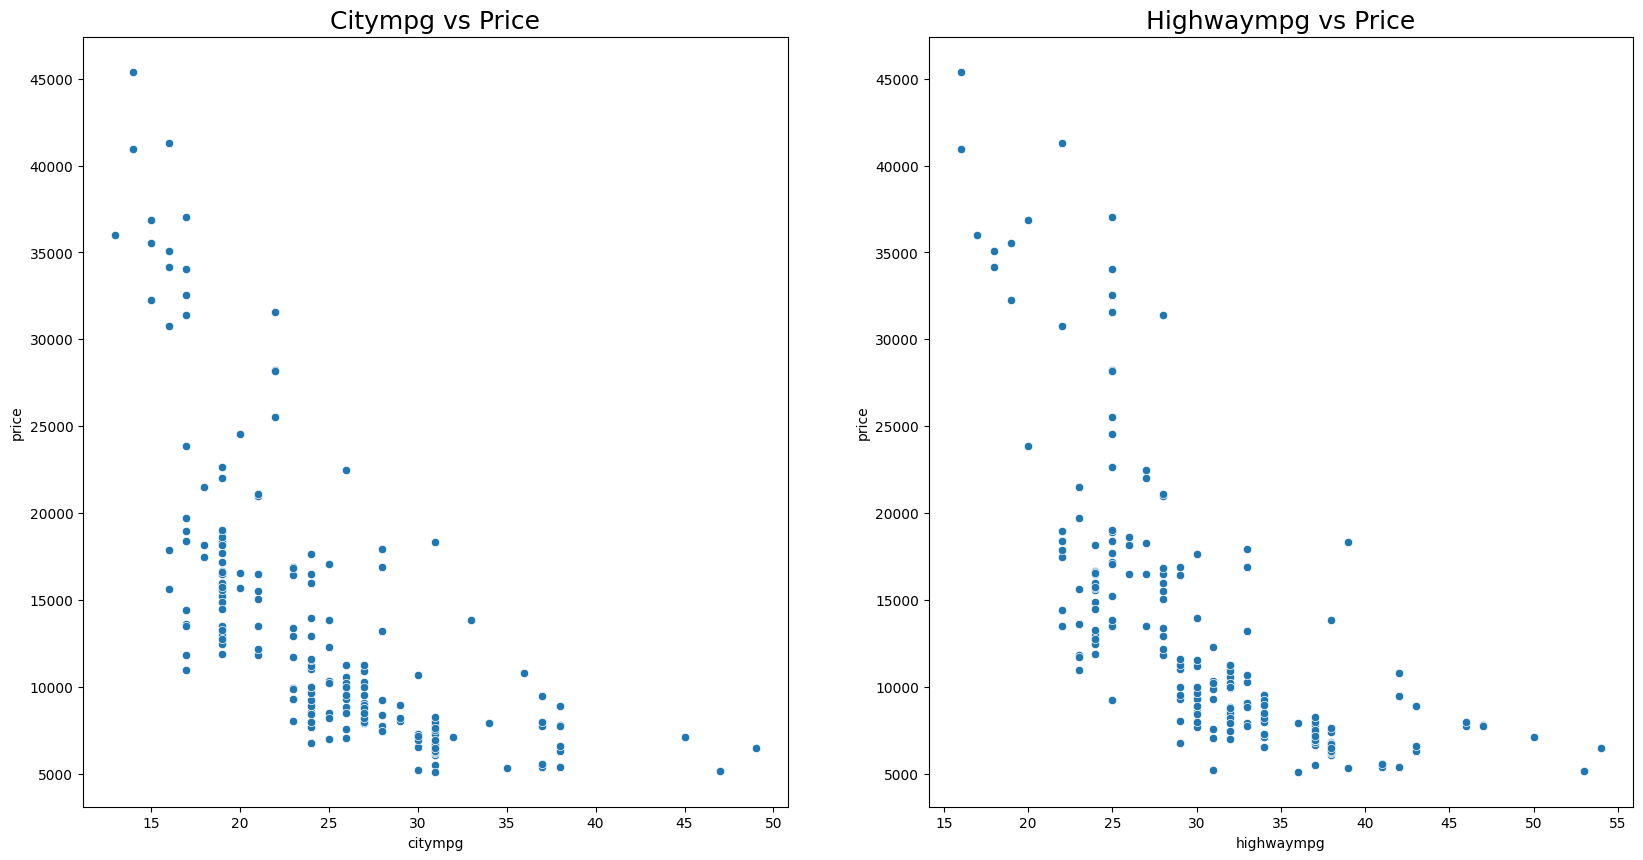

In [85]:
f, ax = plt.subplots(nrows=3,ncols=3, figsize=(30,30))
sns.scatterplot(x='doornumber',y='price',data=temp,ax=ax[0,0])
ax[0,0].set_title("Doornumber vs Price",fontsize=18)

sns.scatterplot(x='cylindernumber',y='price',data=temp,ax=ax[0,1])
ax[0,1].set_title("Cylindernumber vs Price",fontsize=18)

sns.scatterplot(x='carlength',y='price',data=temp,ax=ax[0,2])
ax[0,2].set_title("Car length vs Price",fontsize=18)

sns.scatterplot(x='carwidth',y='price',data=temp,ax=ax[1,0])
ax[1,0].set_title("Car width vs Price",fontsize=18)

sns.scatterplot(x='carheight',y='price',data=temp,ax=ax[1,1])
ax[1,1].set_title("Car height vs Price",fontsize=18)

sns.scatterplot(x='curbweight',y='price',data=temp,ax=ax[1,2])
ax[1,2].set_title("Curbweight vs Price",fontsize=18)

sns.scatterplot(x='boreratio',y='price',data=temp,ax=ax[2,0])
ax[2,0].set_title("Boreratio vs Price",fontsize=18)

sns.scatterplot(x='horsepower',y='price',data=temp,ax=ax[2,1])
ax[2,1].set_title("Horsepower vs Price",fontsize=18)

sns.scatterplot(x='wheelbase',y='price',data=temp,ax=ax[2,2])
ax[2,2].set_title("Wheelbase vs Price",fontsize=18)

f, ax = plt.subplots(ncols=2, figsize=(20,10))
sns.scatterplot(x='citympg',y='price',data=temp,ax=ax[0])
ax[0].set_title("Citympg vs Price",fontsize=18)

sns.scatterplot(x='highwaympg',y='price',data=temp,ax=ax[1])
ax[1].set_title("Highwaympg vs Price",fontsize=18)

Text(0.5, 1.0, 'Highwaympg vs Price')

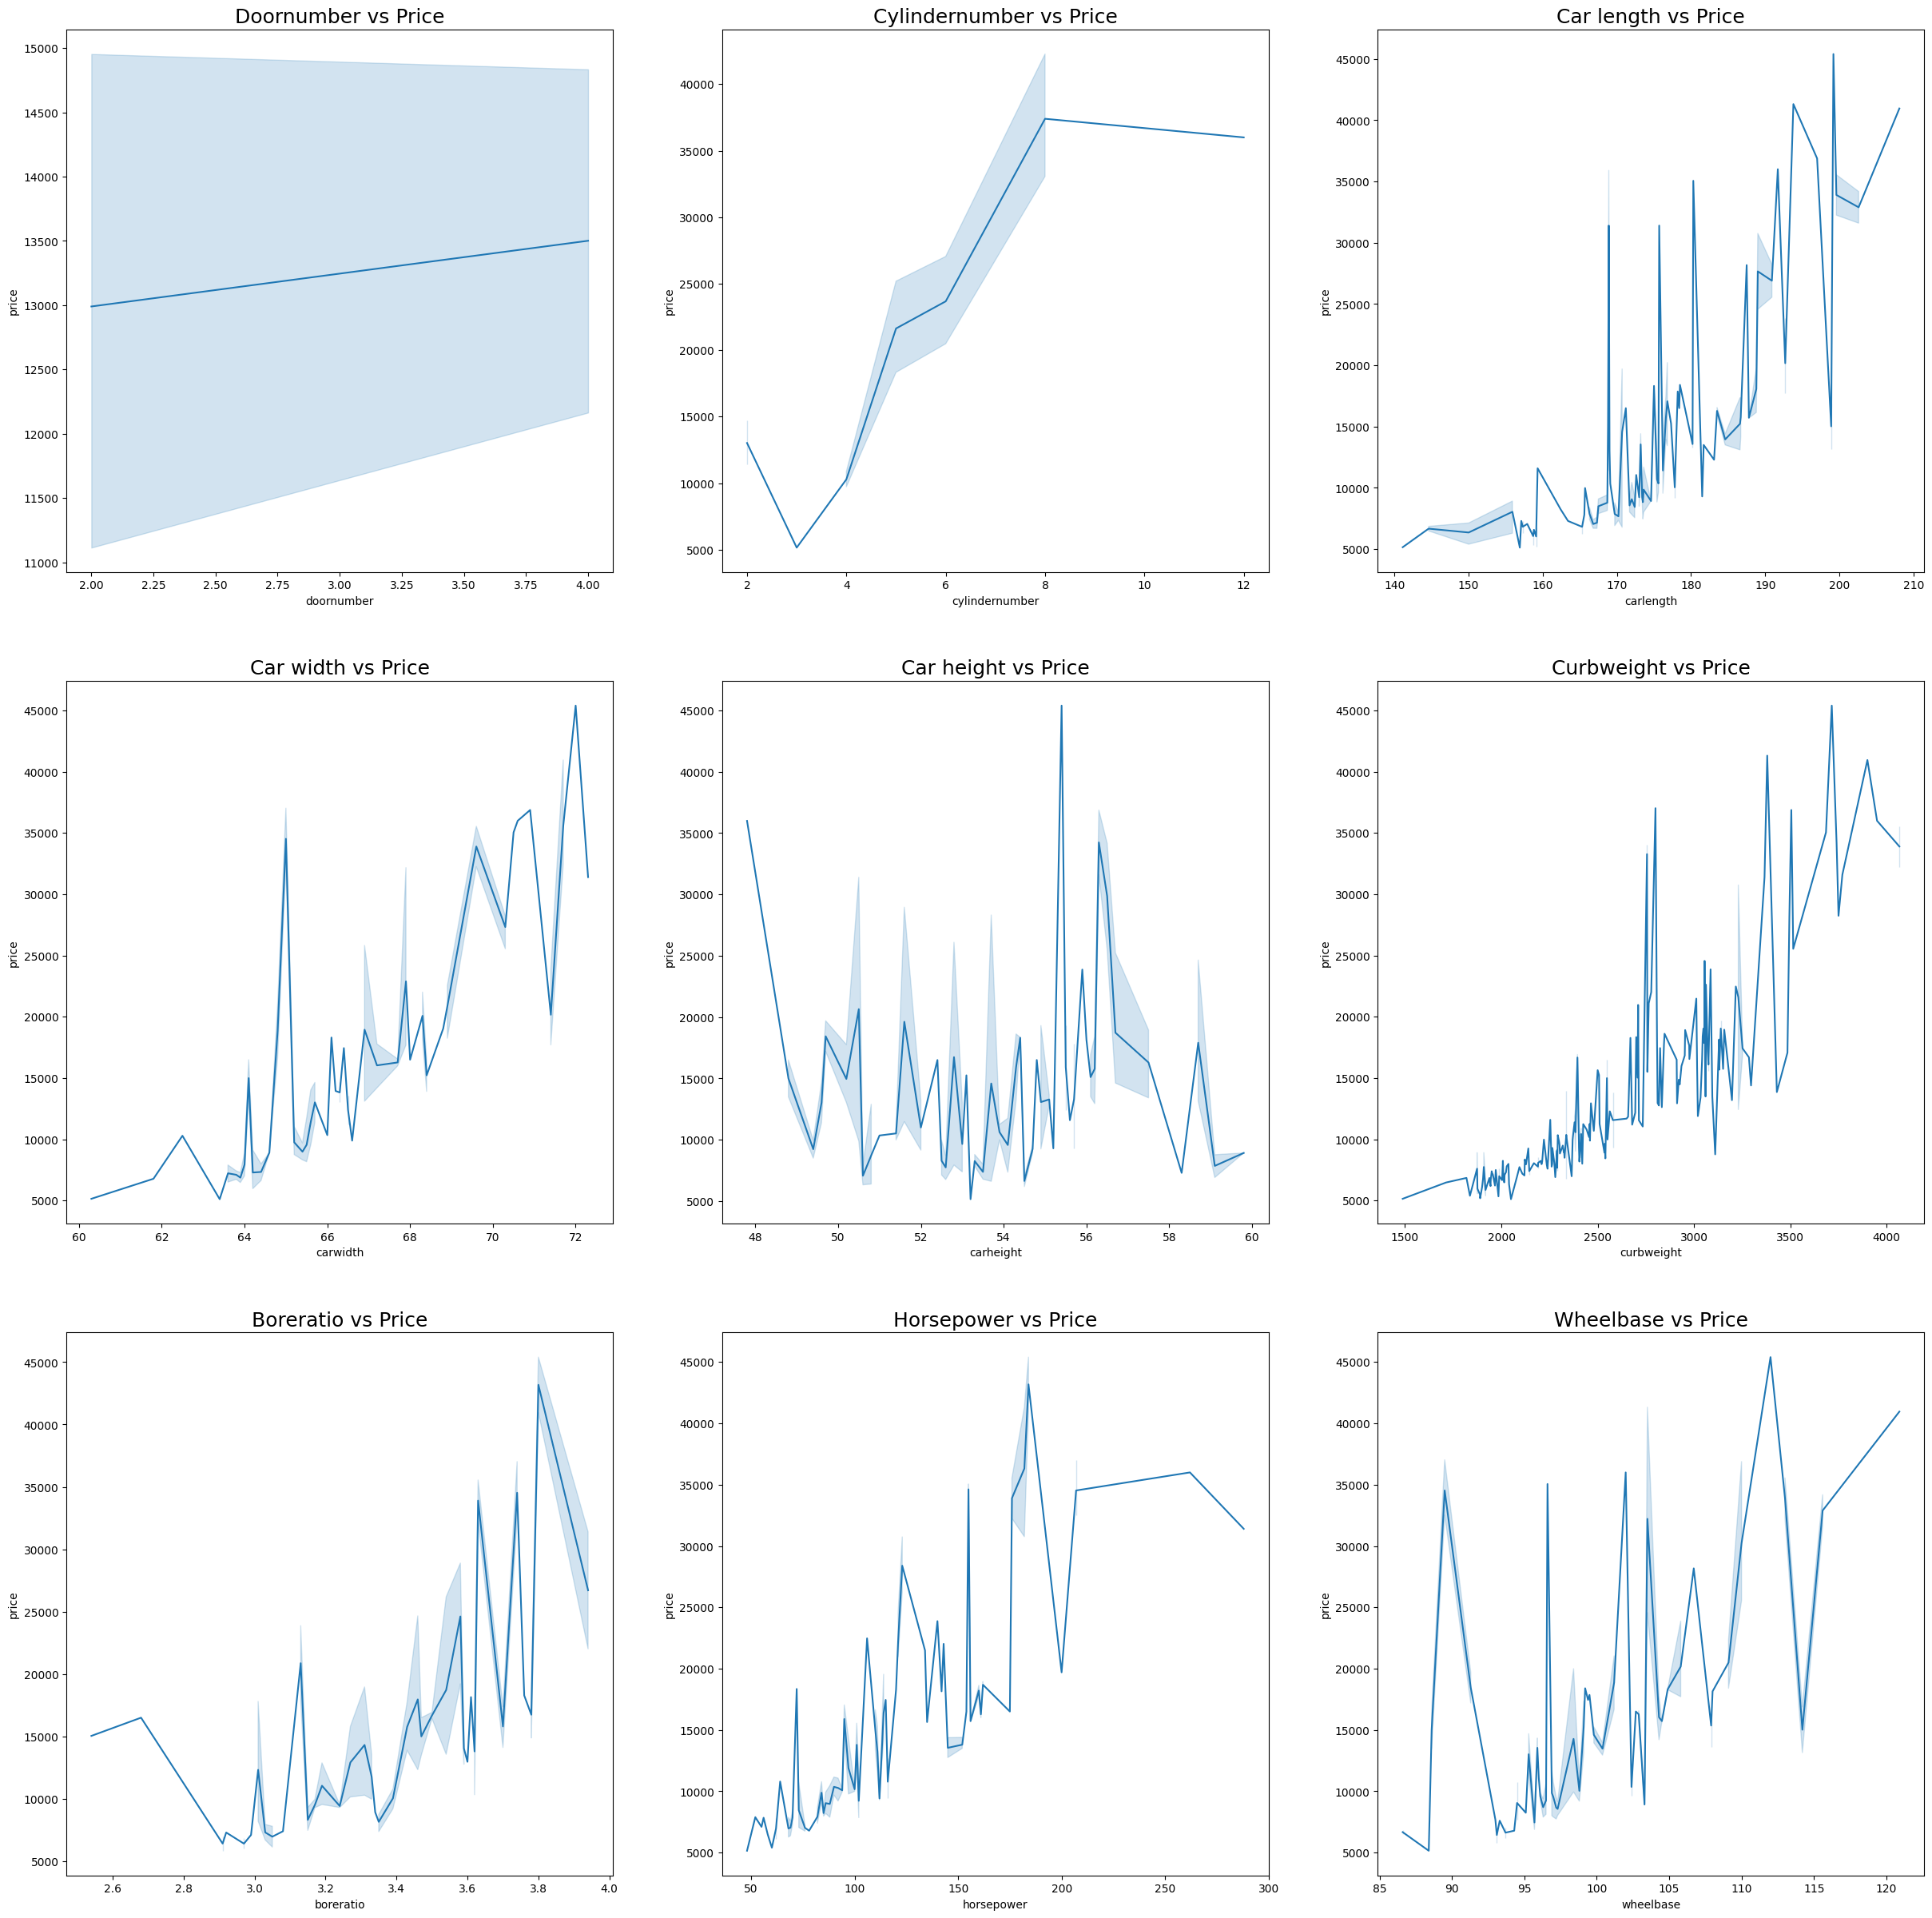

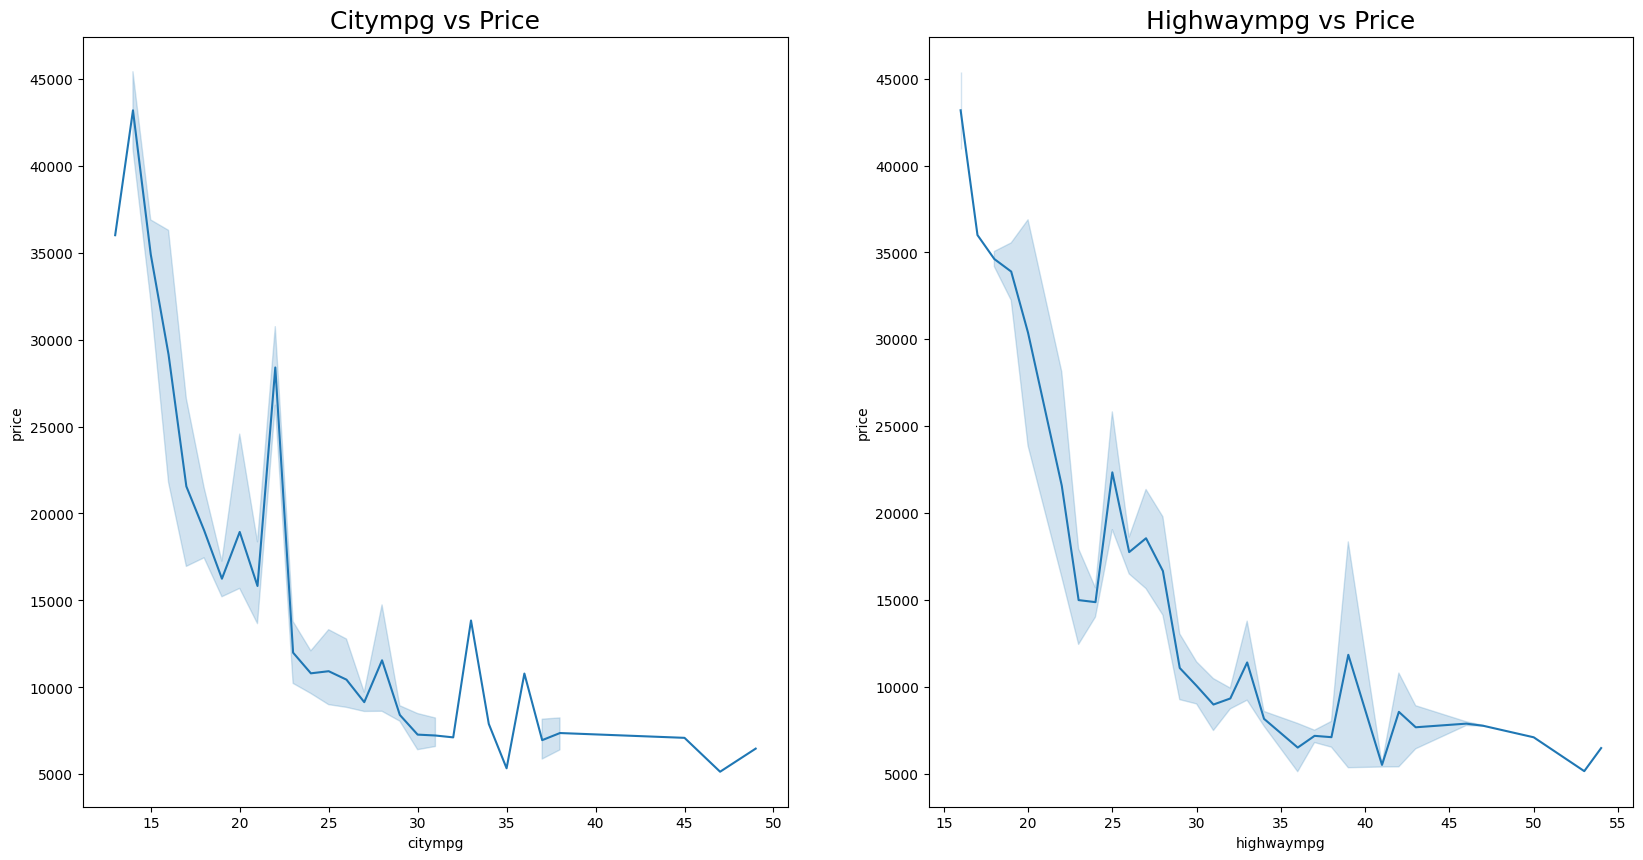

In [86]:
f, ax = plt.subplots(nrows=3,ncols=3, figsize=(30,30))
sns.lineplot(x='doornumber',y='price',data=temp,ax=ax[0,0])
ax[0,0].set_title("Doornumber vs Price",fontsize=18)

sns.lineplot(x='cylindernumber',y='price',data=temp,ax=ax[0,1])
ax[0,1].set_title("Cylindernumber vs Price",fontsize=18)

sns.lineplot(x='carlength',y='price',data=temp,ax=ax[0,2])
ax[0,2].set_title("Car length vs Price",fontsize=18)

sns.lineplot(x='carwidth',y='price',data=temp,ax=ax[1,0])
ax[1,0].set_title("Car width vs Price",fontsize=18)

sns.lineplot(x='carheight',y='price',data=temp,ax=ax[1,1])
ax[1,1].set_title("Car height vs Price",fontsize=18)

sns.lineplot(x='curbweight',y='price',data=temp,ax=ax[1,2])
ax[1,2].set_title("Curbweight vs Price",fontsize=18)

sns.lineplot(x='boreratio',y='price',data=temp,ax=ax[2,0])
ax[2,0].set_title("Boreratio vs Price",fontsize=18)

sns.lineplot(x='horsepower',y='price',data=temp,ax=ax[2,1])
ax[2,1].set_title("Horsepower vs Price",fontsize=18)

sns.lineplot(x='wheelbase',y='price',data=temp,ax=ax[2,2])
ax[2,2].set_title("Wheelbase vs Price",fontsize=18)

f, ax = plt.subplots(ncols=2, figsize=(20,10))
sns.lineplot(x='citympg',y='price',data=temp,ax=ax[0])
ax[0].set_title("Citympg vs Price",fontsize=18)

sns.lineplot(x='highwaympg',y='price',data=temp,ax=ax[1])
ax[1].set_title("Highwaympg vs Price",fontsize=18)

## Inference
### Numeric data
```
> Cylinder number has positive correlation with the price
> Car length has positive correlation with the price
> Car width has positive correlation with the price
> Car height has no significant correlation with the price
> Curb weight has positive correlation with the price
> Horse power has positive correlation with the price
> Wheel base has positive correlation with the price
> Bore ratio has positive correlation with the price
> Citympg has negative correlation with the price
> Highway has negative correlation with the price
```

In [87]:
### Make categories based on average price
cars=temp.copy()
cars.groupby(['Company Name'])['price'].mean().reset_index()
flag=cars.merge(cars.groupby(['Company Name'])['price'].mean().reset_index(),how='left',on="Company Name")
table=pd.cut(flag['price_y'],bins=[0,10000,20000,40000],labels=['Budget','Medium','Luxury'],right=False)
temp['range']=table
temp.head()

<ipython-input-87-8d5ce4ec91dd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['range']=table


,car_ID,symboling,Company Name,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,range
0,1,3,alfa-romero,alfa-romero giulia,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,2,convertible,rwd,front,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium
3,4,2,audi,audi 100 ls,gas,std,4,sedan,fwd,front,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium
4,5,2,audi,audi 100ls,gas,std,4,sedan,4wd,front,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium


In [88]:
### Convert Catregories into Numerical for regression
# Defining the map function
def convert_label(label,data):
    temp = pd.get_dummies(data[label])
    data = pd.concat([data, temp], axis = 1)
    data=data.drop([label], axis = 1)
    return data
temp = convert_label('fueltype',temp)
temp = convert_label('carbody',temp)
temp = convert_label('enginetype',temp)
temp = convert_label('aspiration',temp)
temp = convert_label('drivewheel',temp)
temp = convert_label('enginelocation',temp)
temp = convert_label('fuelsystem',temp)
temp = convert_label('range',temp)
temp = convert_label('Company Name',temp)

In [89]:
temp.shape

(205, 74)

In [90]:
temp.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
0,1,3,alfa-romero giulia,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2,94.5,171.2,65.5,52.4,2823,6,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,0,0,0


# 5:Train-Test Split and feature scaling
---



In [91]:
temp.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'diesel', 'gas',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'std', 'turbo', '4wd',
       'fwd', 'rwd', 'front', 'rear', '1bbl', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'Budget', 'Medium', 'Luxury', 'alfa-romero',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'vokswagen', 'volkswagen', 'volvo'],
      dtype='object')

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
header = ['wheelbase', 'curbweight','enginesize','horsepower','citympg','highwaympg','carlength','carwidth','price']
temp[header] = scaler.fit_transform(temp[header])
temp.head()

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
0,1,3,alfa-romero giulia,2,0.058309,0.413433,0.316667,48.8,0.411171,4,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2,0.058309,0.413433,0.316667,48.8,0.411171,4,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2,0.230321,0.449254,0.433333,52.4,0.517843,6,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4,0.384840,0.529851,0.491667,54.3,0.329325,4,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4,0.373178,0.529851,0.508333,54.3,0.518231,5,...,0,0,0,0,0,0,0,0,0,0


In [93]:
labels=pd.DataFrame({'price':temp['price'].to_list()})
labels.head()

,price
0,0.207959
1,0.282558
2,0.282558
3,0.219254
4,0.306142


In [94]:
dataset=temp.drop(['price','carheight','CarName','car_ID'],axis=1)
dataset.head()

,symboling,doornumber,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,vokswagen,volkswagen,volvo
0,3,2,0.058309,0.413433,0.316667,0.411171,4,0.260377,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,2,0.058309,0.413433,0.316667,0.411171,4,0.260377,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.230321,0.449254,0.433333,0.517843,6,0.343396,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,2,4,0.384840,0.529851,0.491667,0.329325,4,0.181132,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0.373178,0.529851,0.508333,0.518231,5,0.283019,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.model_selection import train_test_split
X_raw,X_test,y_raw,y_test  = train_test_split(dataset,
                                              labels,
                                              test_size=0.2,
                                              random_state = 1)



In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_raw,y_raw)


LinearRegression()

In [97]:
pred=model.predict(X_test)
model.score(X_test,y_test)

0.8412123357876511

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)


0.005377328580658193

In [99]:
predictions= pred.flatten()